In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Task 1: Data Exploration and Understanding

**1.1 Dataset Investigation**

Load the credit card fraud detection dataset

In [220]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

Examine the basic structure: shape, data types, memory usage

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [222]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [223]:
df.shape

(284807, 31)

In [224]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [225]:
df['V1'][0].dtype

dtype('float64')

Generate comprehensive descriptive statistics for all features

In [226]:
df.describe(include='float64',percentiles=[0.20,0.25,0.30,0.40,0.50,0.75])

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.369007e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
20%     47694.200000 -1.134663e+00 -7.908142e-01 -1.169050e+00 -1.066085e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
30%     60776.000000 -7.472943e-01 -4.363931e-01 -6.168060e-01 -6.962262e-01   
40%     73261.400000 -4.267559e-01 -1.538049e-01 -1.990610e-01 -3.941610e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.500885e-15 -5.620335e-16  1.149614e-16 -2.426963e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
20%   -8.595815e-01 -8.781527e-01 -6.833164e-01 -2.662999e-01 -8.088755e-01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
30%   -5.444552e-01 -6.678449e-01 -4.260203e-01 -1.581584e-01 -5.021651e-01   
40%   -2.901118e-01 -4.794725e-01 -1.593408e-01 -6.605715e-02 -2.577302e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V20           V21           V22           V23  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  6.386744e-16  1.596686e-16 -3.576577e-16  2.650499e-16   
std    ...  7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01   
min    ... -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01   
20%    ... -2.512018e-01 -2.663929e-01 -6.416046e-01 -2.037425e-01   
25%    ... -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01   
30%    ... -1.787040e-01 -1.878180e-01 -4.344265e-01 -1.261571e-01   
40%    ... -1.208067e-01 -1.064266e-01 -2.018541e-01 -6.512670e-02   
50%    ... -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02   
75%    ...  1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01   
max    ...  3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01   

                V24           V25           V26           V27           V28  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.472317e-15  5.109395e-16  1.686100e-15 -3.662399e-16 -1.225457e-16   
std    6.056471e-01  5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01   
min   -2.836627e+00 -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01   
20%   -4.442769e-01 -3.917190e-01 -3.895481e-01 -9.111428e-02 -6.544115e-02   
25%   -3.545861e-01 -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02   
30%   -2.635025e-01 -2.583651e-01 -2.744373e-01 -5.423468e-02 -4.026708e-02   
40%   -4.580667e-02 -1.288661e-01 -1.663338e-01 -2.436683e-02 -1.195983e-02   
50%    4.097606e-02  1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02   
75%    4.395266e-01  3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02   
max    4.584549e+00  7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   

              Amount  
count  284807.000000  
mean       88.349619  
std       250.120109  
min         0.000000  
20%         3.570000  
25%         5.600000  
30%         8.910000  
40%        13.000000  
50%        22.000000  
75%        77.165000  
max     25691.160000  

[11 rows x 30 columns]

Analyze the class distribution and calculate imbalance ratio

In [227]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [228]:
class_0= df['Class'].value_counts()[0]/df['Class'].value_counts().sum()*100
class_1=df['Class'].value_counts()[1]/df['Class'].value_counts().sum()*100
print(f'Class 0 is {np.round(class_0,4)}%,\nbut class 1 is {np.round(class_1,4)}%')

Class 0 is 99.8273%,
but class 1 is 0.1727%


**1.2 Exploratory Data Analysis**

Create detailed visualizations of class distribution (count plot, pie chart)

<Axes: xlabel='Class', ylabel='count'>

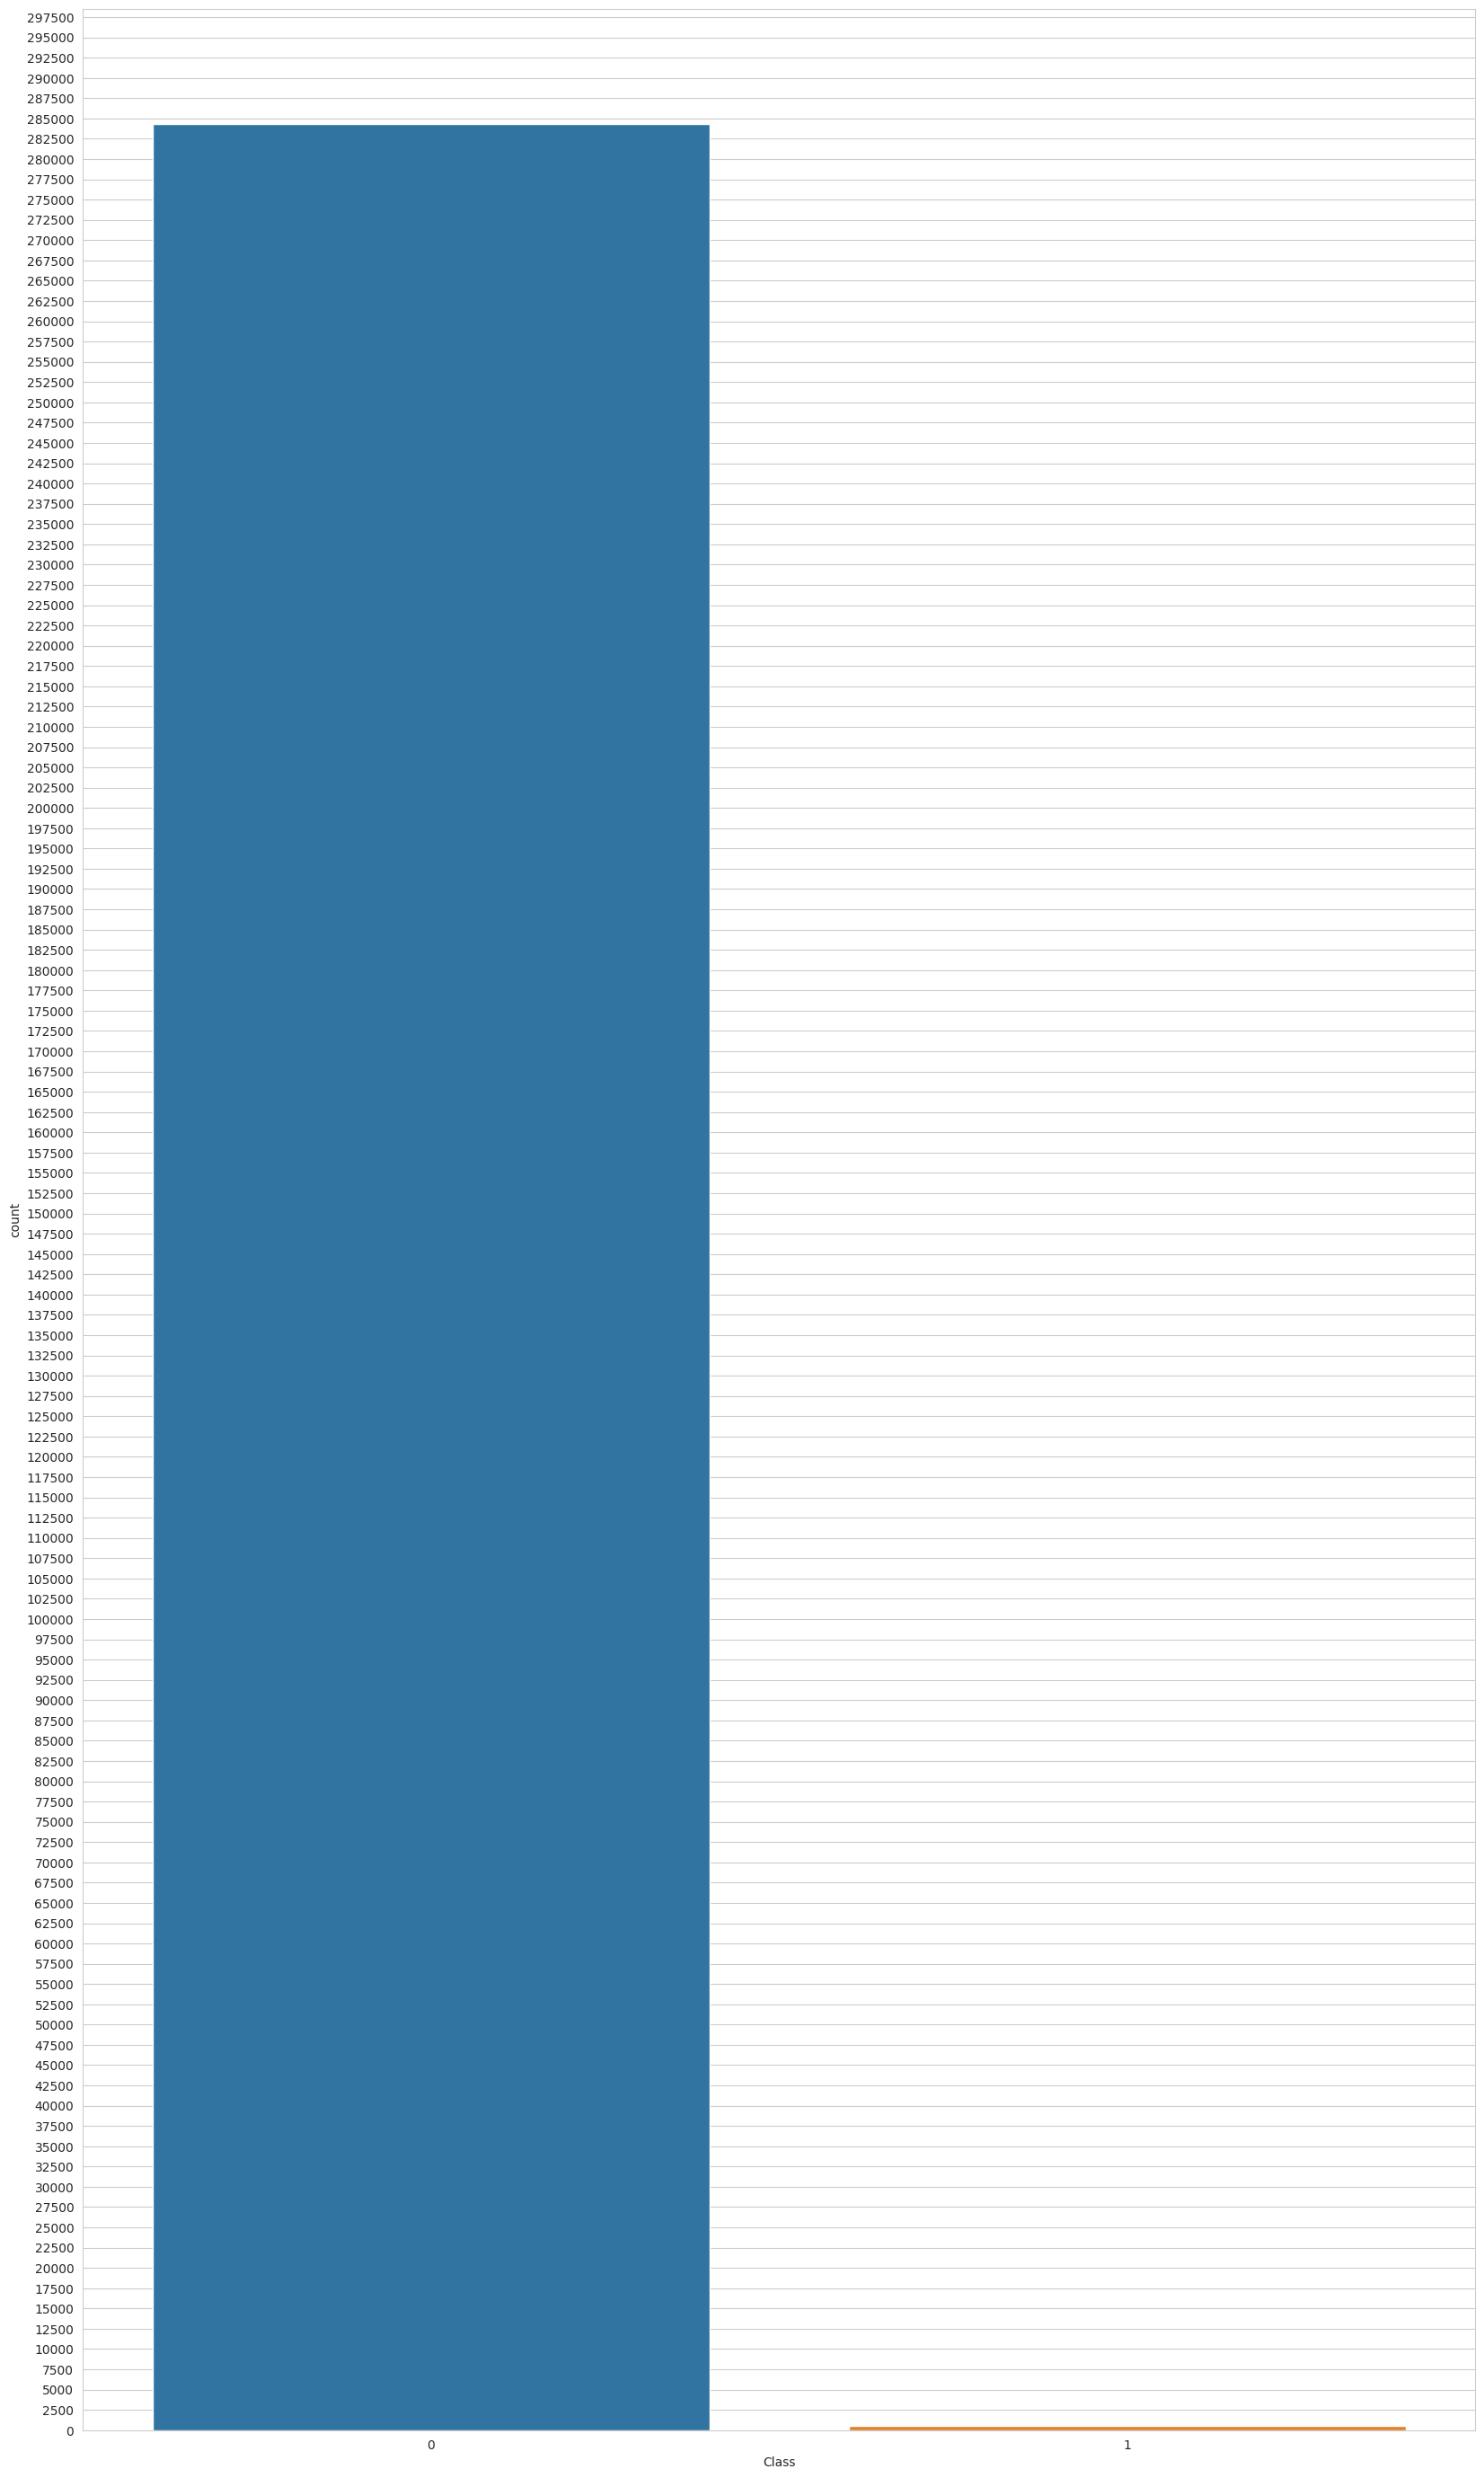

In [229]:
plt.figure(figsize=(20,35))
plt.yticks(np.arange(0,300000,2500))
sns.countplot(data=df,x=df['Class'])


([<matplotlib.patches.Wedge at 0x7b1e3d6627d0>,
 [Text(-1.09998380137016, 0.0059696501784341355, '0'),
  Text(1.0999838018177286, -0.005969567707642625, '1')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.83%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.17%')])

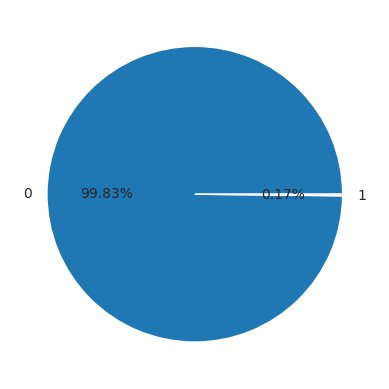

In [230]:
plt.pie(x=df['Class'].value_counts(),labels=[0,1],autopct='%1.2f%%')


Plot histograms and box plots for Time and Amount features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='Time'>

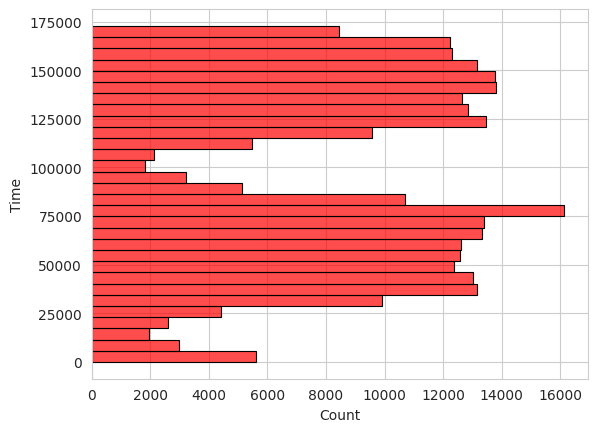

In [231]:
sns.histplot(data=df['Amount'],y=df['Time'], bins=30, edgecolor='black', alpha=0.7,color='red') 


<Axes: >

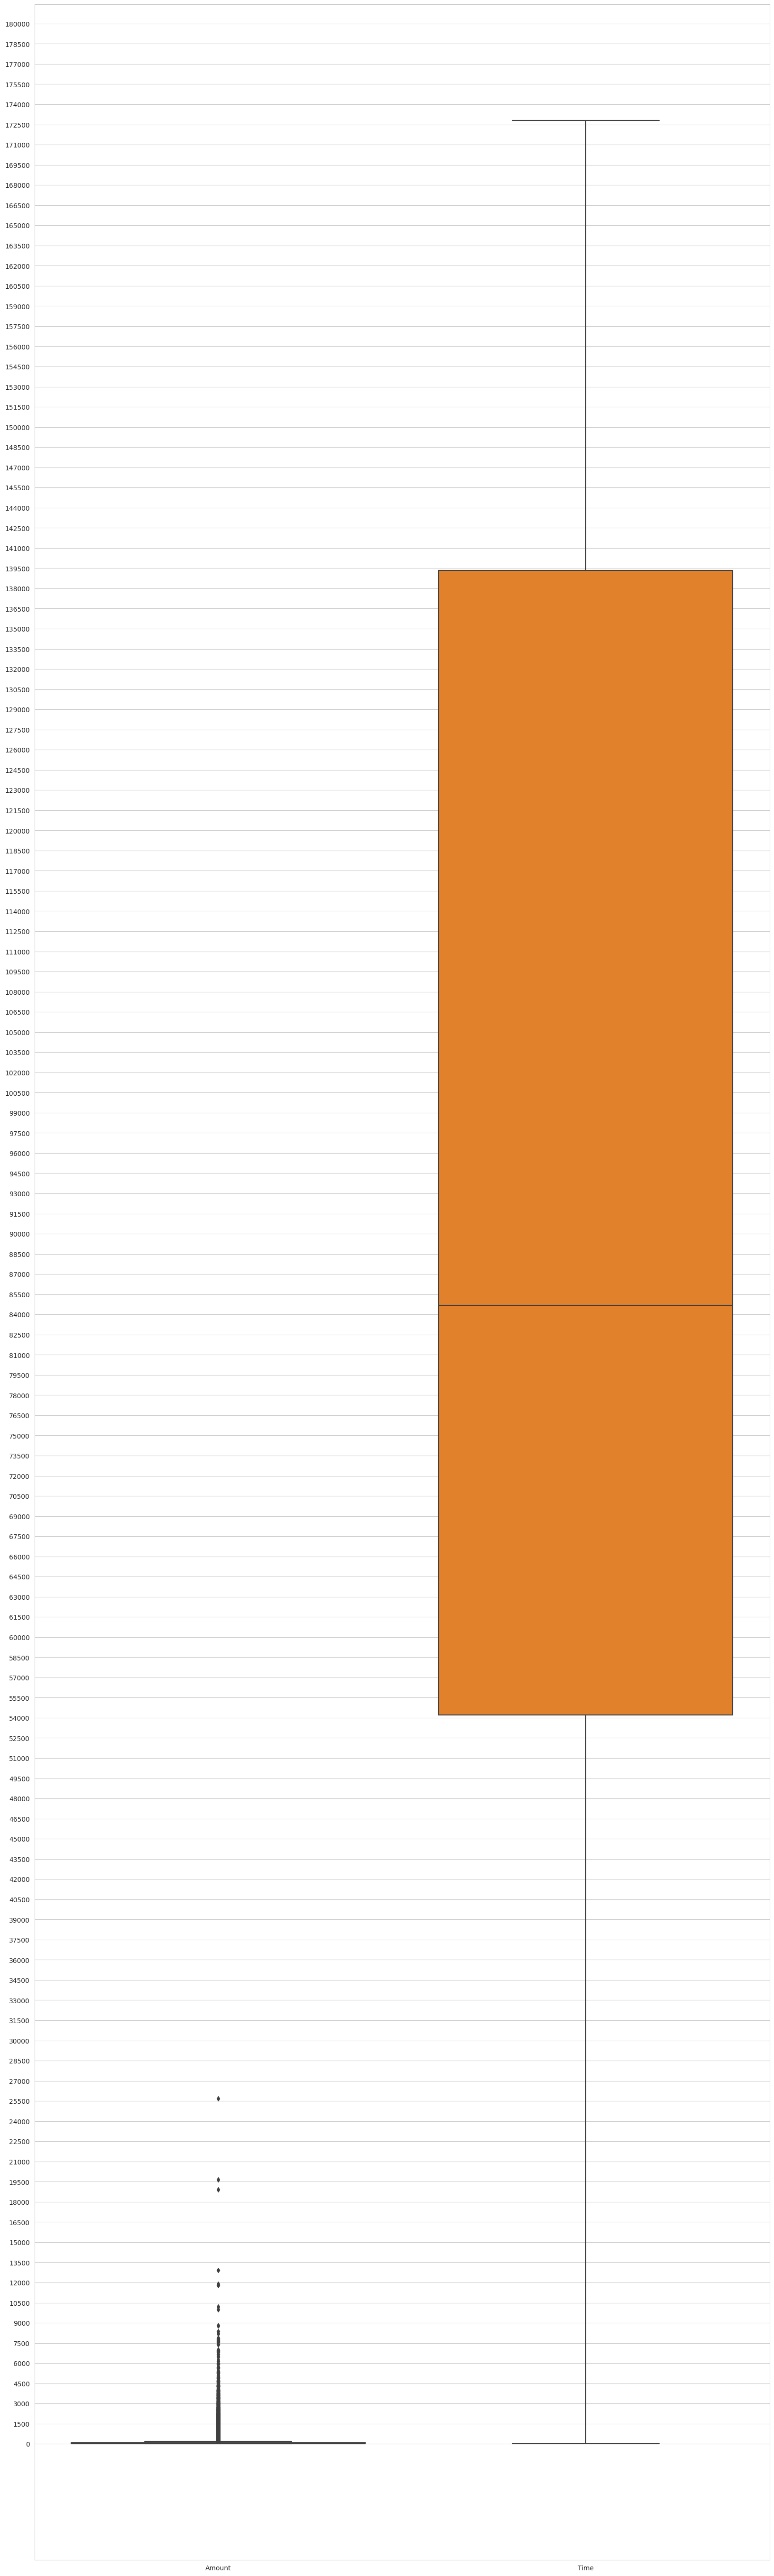

In [232]:
plt.figure(figsize=(20,70))
plt.yticks(np.arange(0,250000,1500))
sns.boxplot(data=df[['Amount','Time']])


 Generate correlation heatmap for all features

<Axes: >

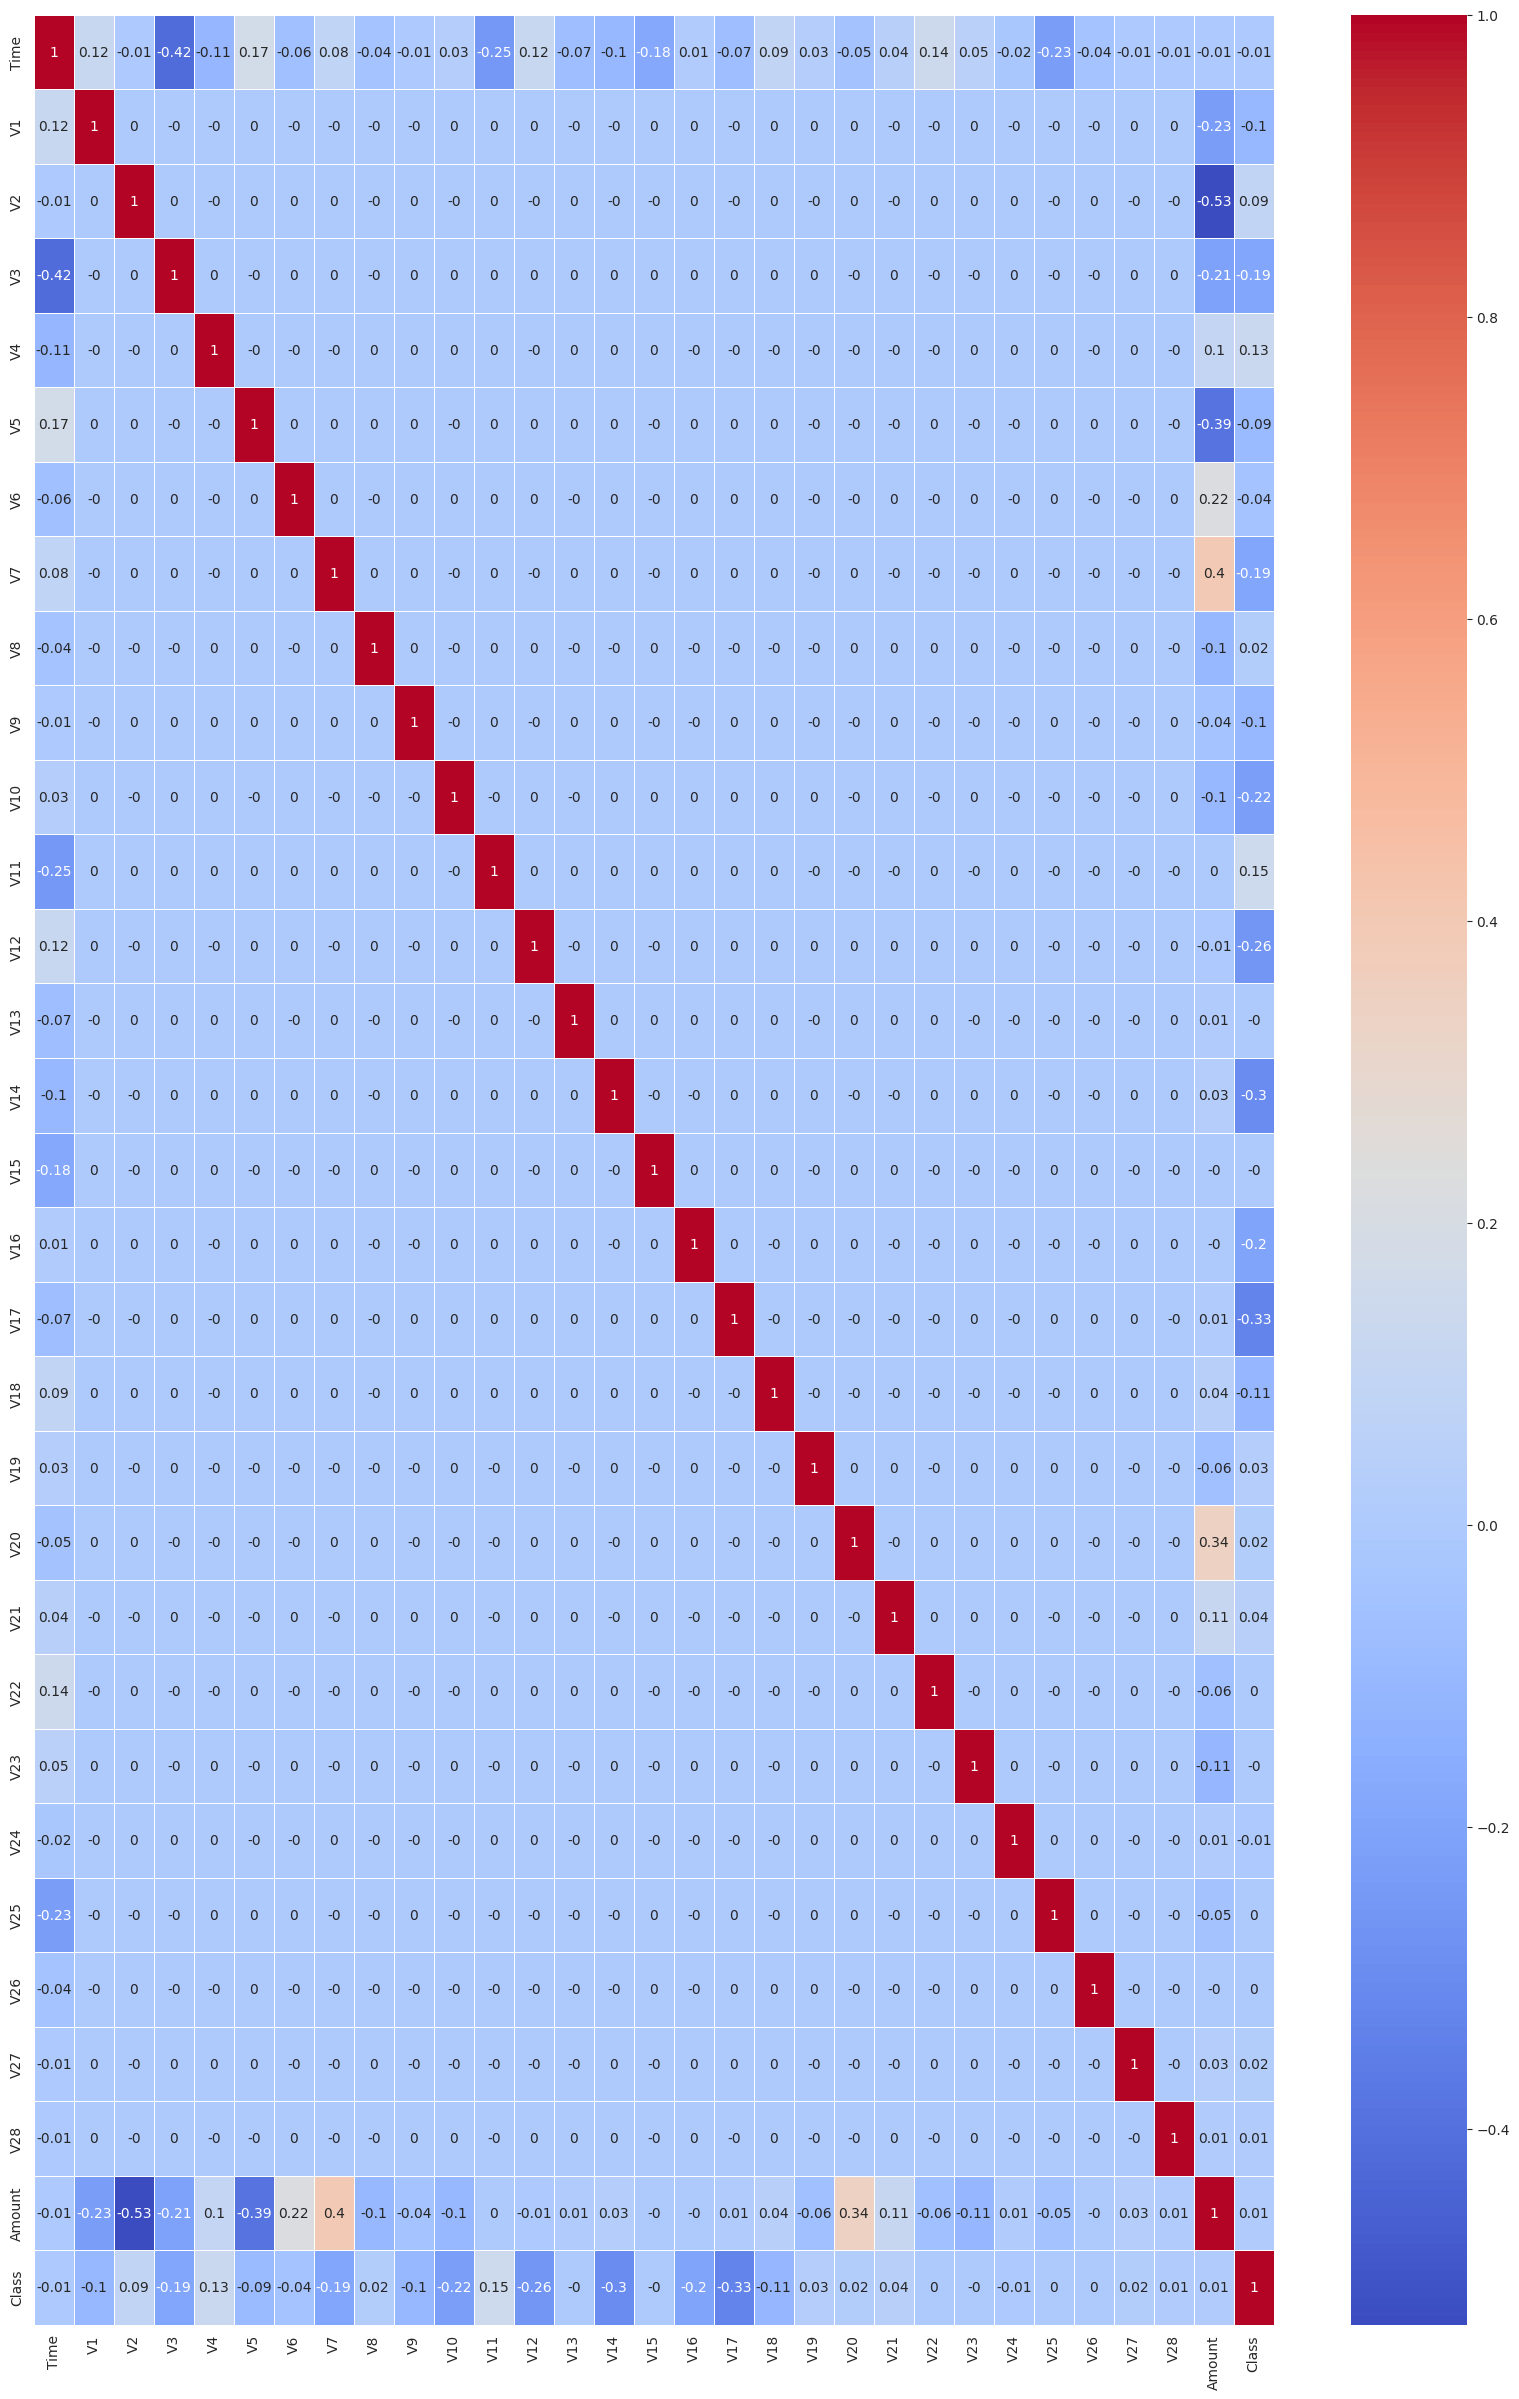

In [233]:
plt.figure(figsize=(20,30))
sns.heatmap(round(df.corr(),2),annot=True,cmap='coolwarm',linewidth=0.7)

Analyze the distribution of PCA features (V1-V28) for both classes

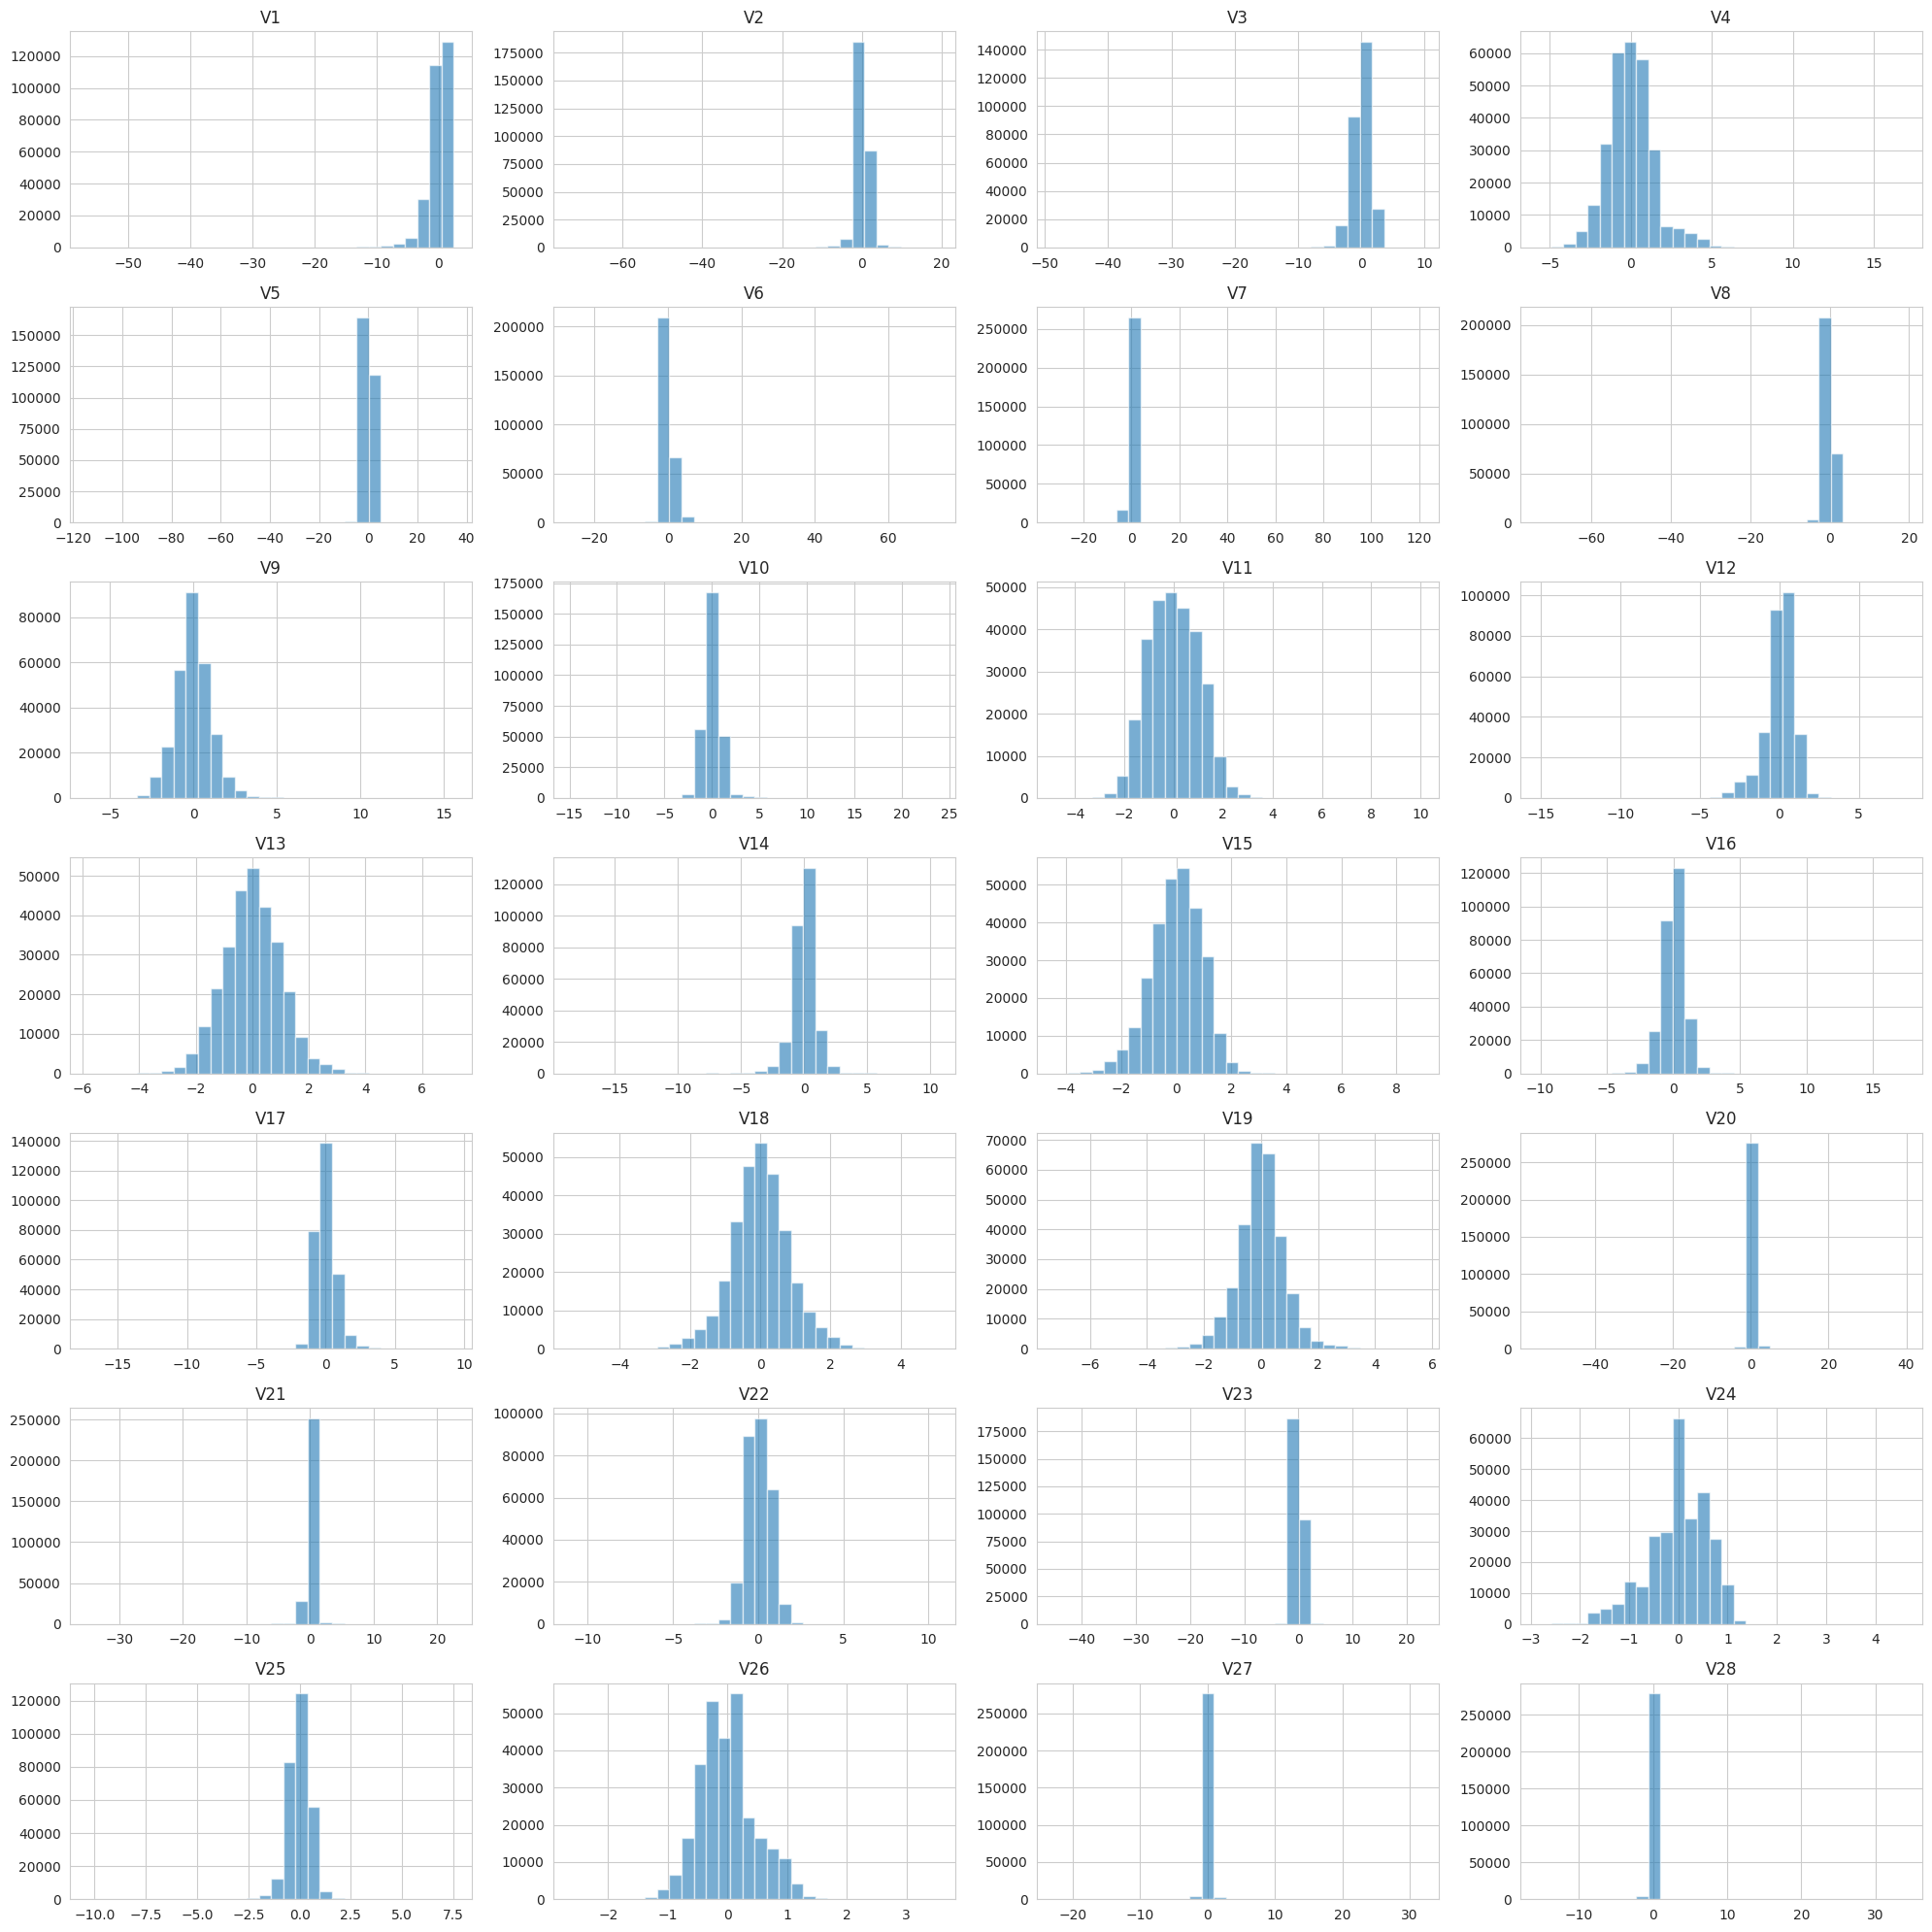

In [234]:
features = [f"V{i}" for i in range(1,29)]
df.groupby("Class")[features].describe()
features = [f"V{i}" for i in range(1,29)]
fig, axes = plt.subplots(7, 4, figsize=(20,20))  # 28 Subplots
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[df["Class"]==0][col], bins=30, alpha=0.6, label="Non-Fraud")
    axes[i].set_title(col)
plt.tight_layout()    
plt.show()

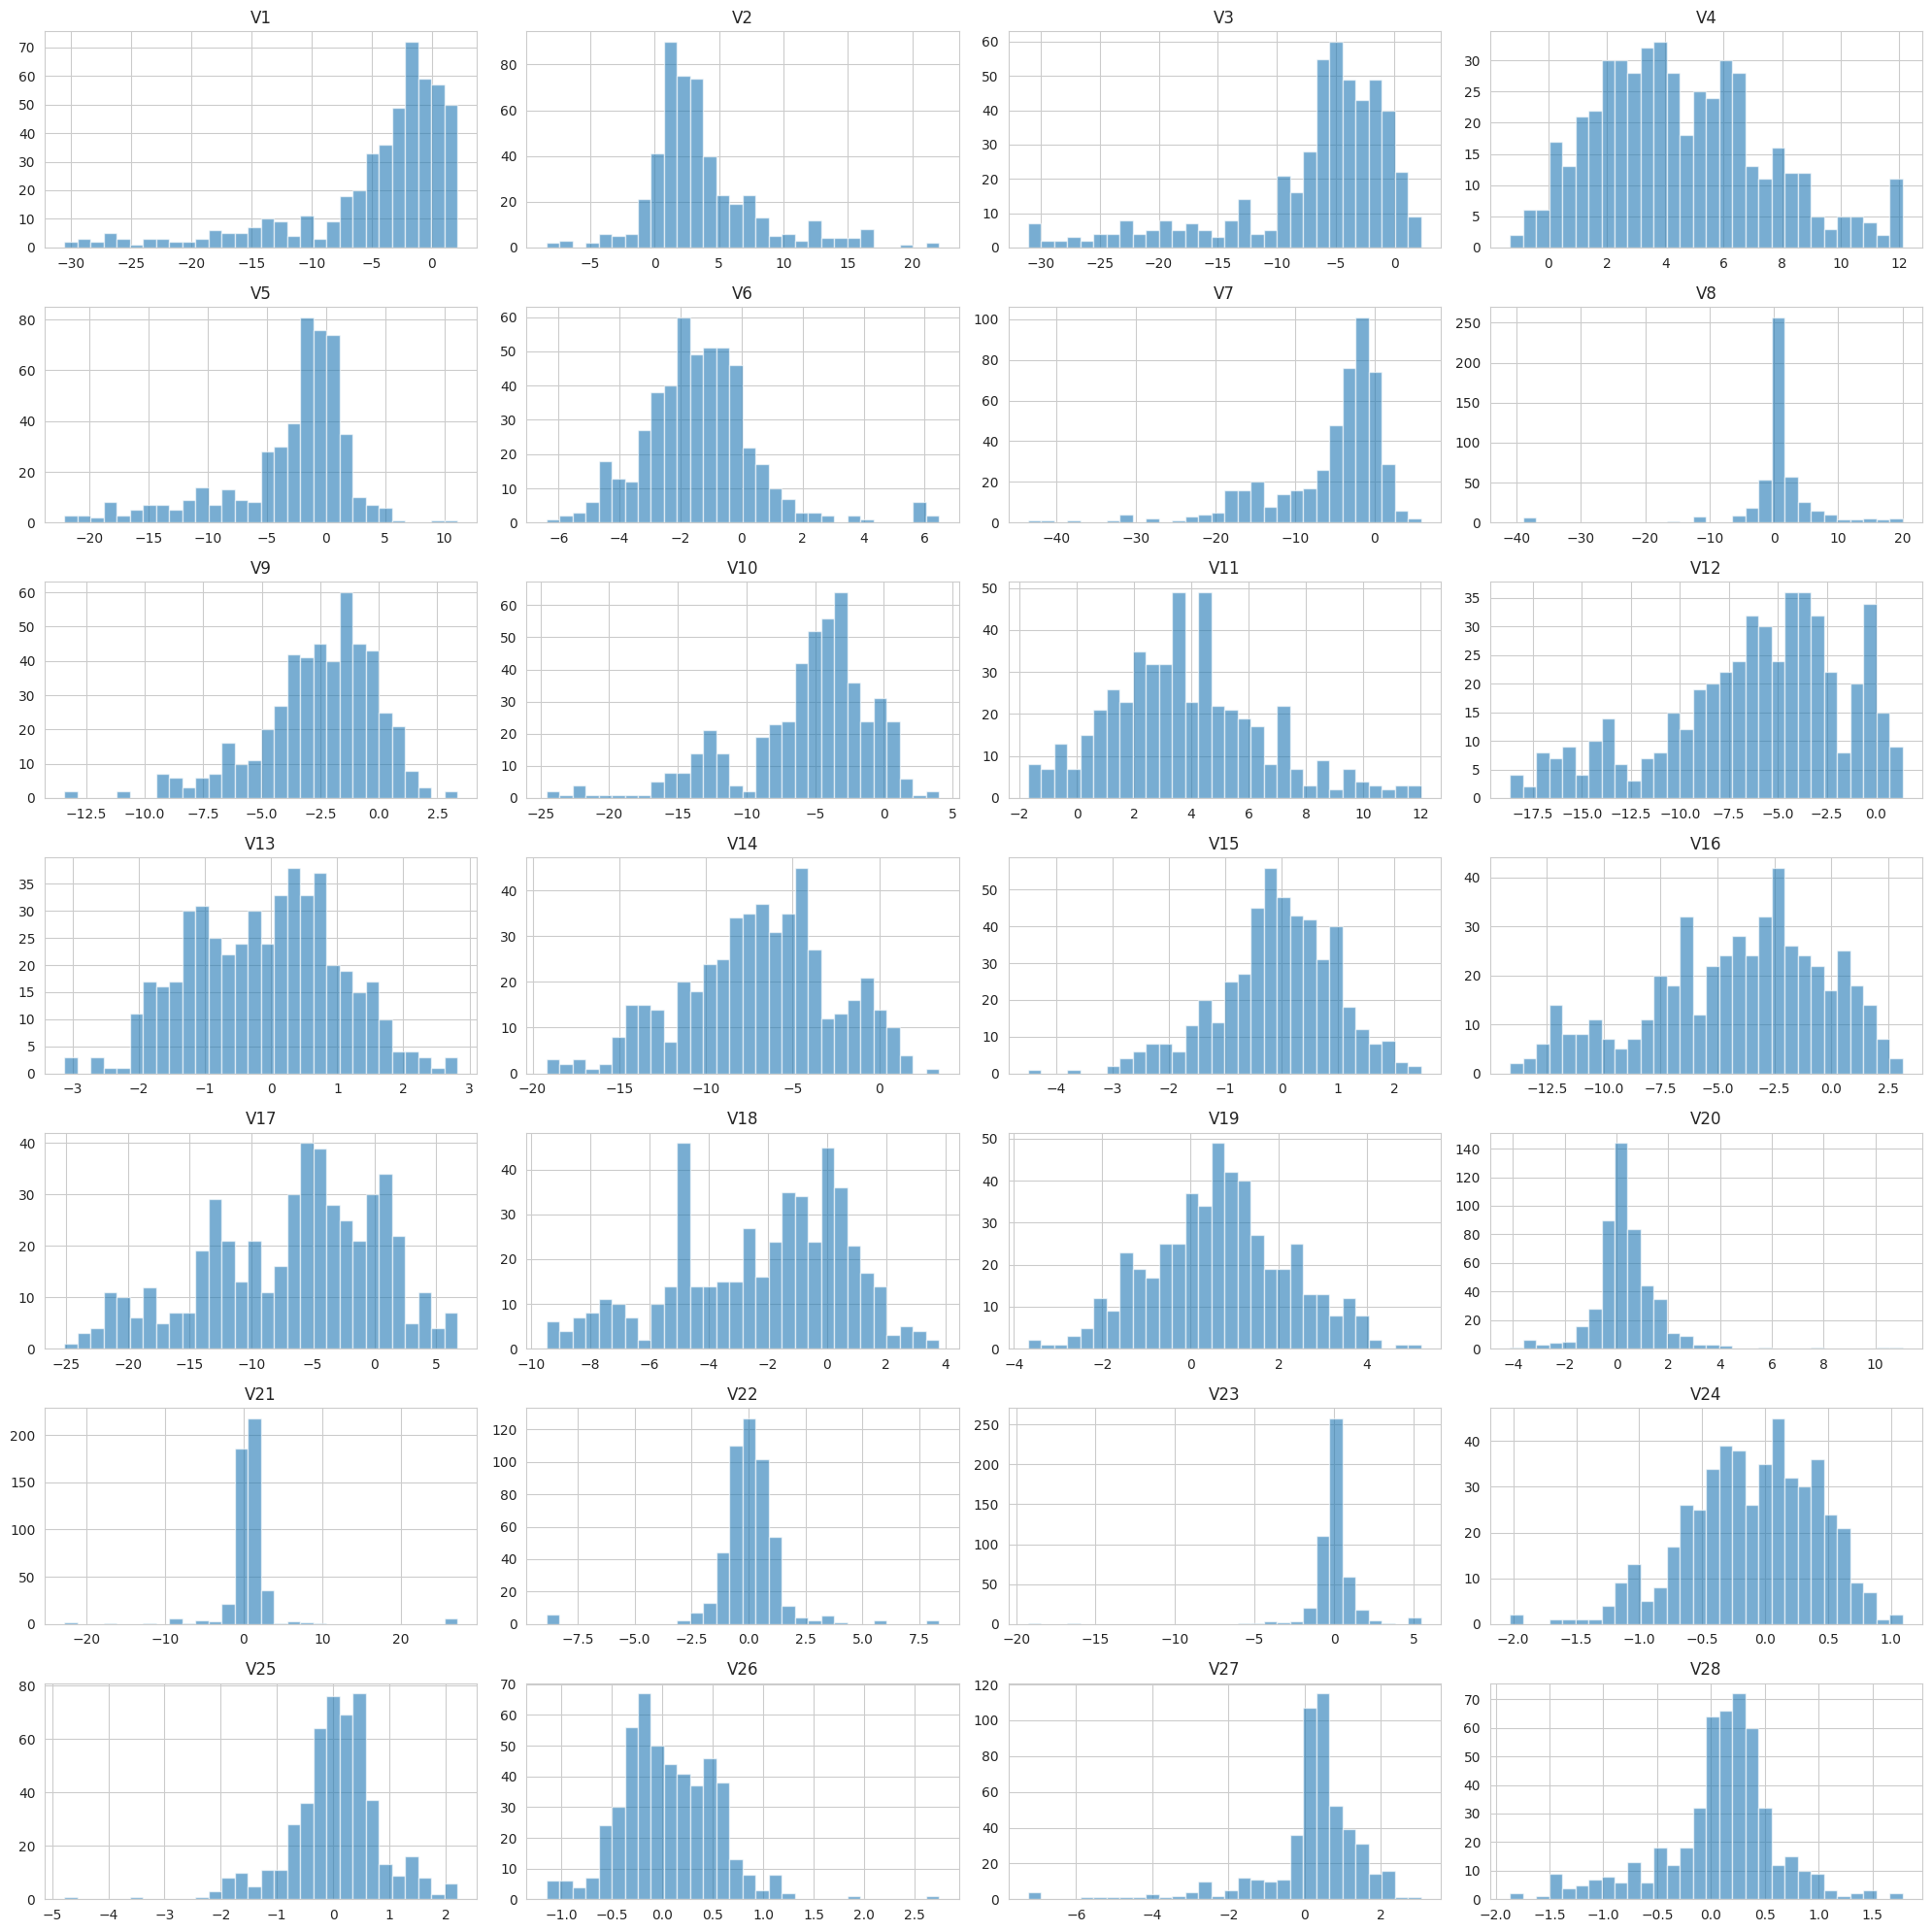

In [235]:
features = [f"V{i}" for i in range(1,29)]
fig, axes = plt.subplots(7, 4, figsize=(20,20))  # 28 Subplots
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[df["Class"]==1][col], bins=30, alpha=0.6, label="Fraud")
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Create transaction time analysis (hourly patterns, detect anomalies)

In [236]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [237]:
df['Time_to_hours'] =round(df["Time"] / 3600)


In [238]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V22       V23  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.277838 -0.110474   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.638672  0.101288   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.771679  0.909412   
3       1.247203  0.237609  0.377436 -1.387024  ...  0.005274 -0.190321   
4       0.095921  0.592941 -0.270533  0.817739  ...  0.798278 -0.137458   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.111864  1.014480   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.924384  0.012463   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.578229 -0.037501   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.800049 -0.163298   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  \
0       0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0   
1      -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0   
2      -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0   
3      -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0   
4       0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0   
...          ...       ...       ...       ...       ...     ...    ...   
284802 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77      0   
284803 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79      0   
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0   
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0   
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0   

        Time_to_hours  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
284802           48.0  
284803           48.0  
284804           48.0  
284805           48.0  
284806           48.0  

[284807 rows x 32 columns]

In [239]:
Amounts_by_hour=df.groupby('Time_to_hours')['Amount'].sum()
Amounts_by_hour

Time_to_hours
0.0     155466.19
1.0     191327.41
2.0     106372.02
3.0     123080.07
4.0      80268.94
5.0      71673.17
6.0     111616.90
7.0     182063.13
8.0     373577.53
9.0     646376.25
10.0    870541.81
11.0    962823.96
12.0    969626.98
13.0    776974.40
14.0    810935.40
15.0    861370.62
16.0    792647.71
17.0    833062.31
18.0    735715.37
19.0    634272.19
20.0    642230.56
21.0    736826.72
22.0    724033.43
23.0    513121.04
24.0    311199.13
25.0    153662.72
26.0    113127.88
27.0    108239.72
28.0     90047.70
29.0     76339.25
30.0     97068.50
31.0    165579.48
32.0    294517.72
33.0    655349.76
34.0    886980.34
35.0    877104.82
36.0    850163.16
37.0    710280.50
38.0    792218.45
39.0    917021.61
40.0    832058.89
41.0    841508.28
42.0    713503.44
43.0    633165.49
44.0    519878.29
45.0    586841.32
46.0    513012.13
47.0    372873.58
48.0    144843.74
Name: Amount, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.YTick at 0x7b1e3b9a6810>,
 [Text(0, 100000, '100000'),
  Text(0, 150000, '150000'),
  Text(0, 200000, '200000'),
  Text(0, 250000, '250000'),
  Text(0, 300000, '300000'),
  Text(0, 350000, '350000'),
  Text(0, 400000, '400000'),
  Text(0, 450000, '450000'),
  Text(0, 500000, '500000'),
  Text(0, 550000, '550000'),
  Text(0, 600000, '600000'),
  Text(0, 650000, '650000'),
  Text(0, 700000, '700000'),
  Text(0, 750000, '750000'),
  Text(0, 800000, '800000'),
  Text(0, 850000, '850000'),
  Text(0, 900000, '900000'),
  Text(0, 950000, '950000')])

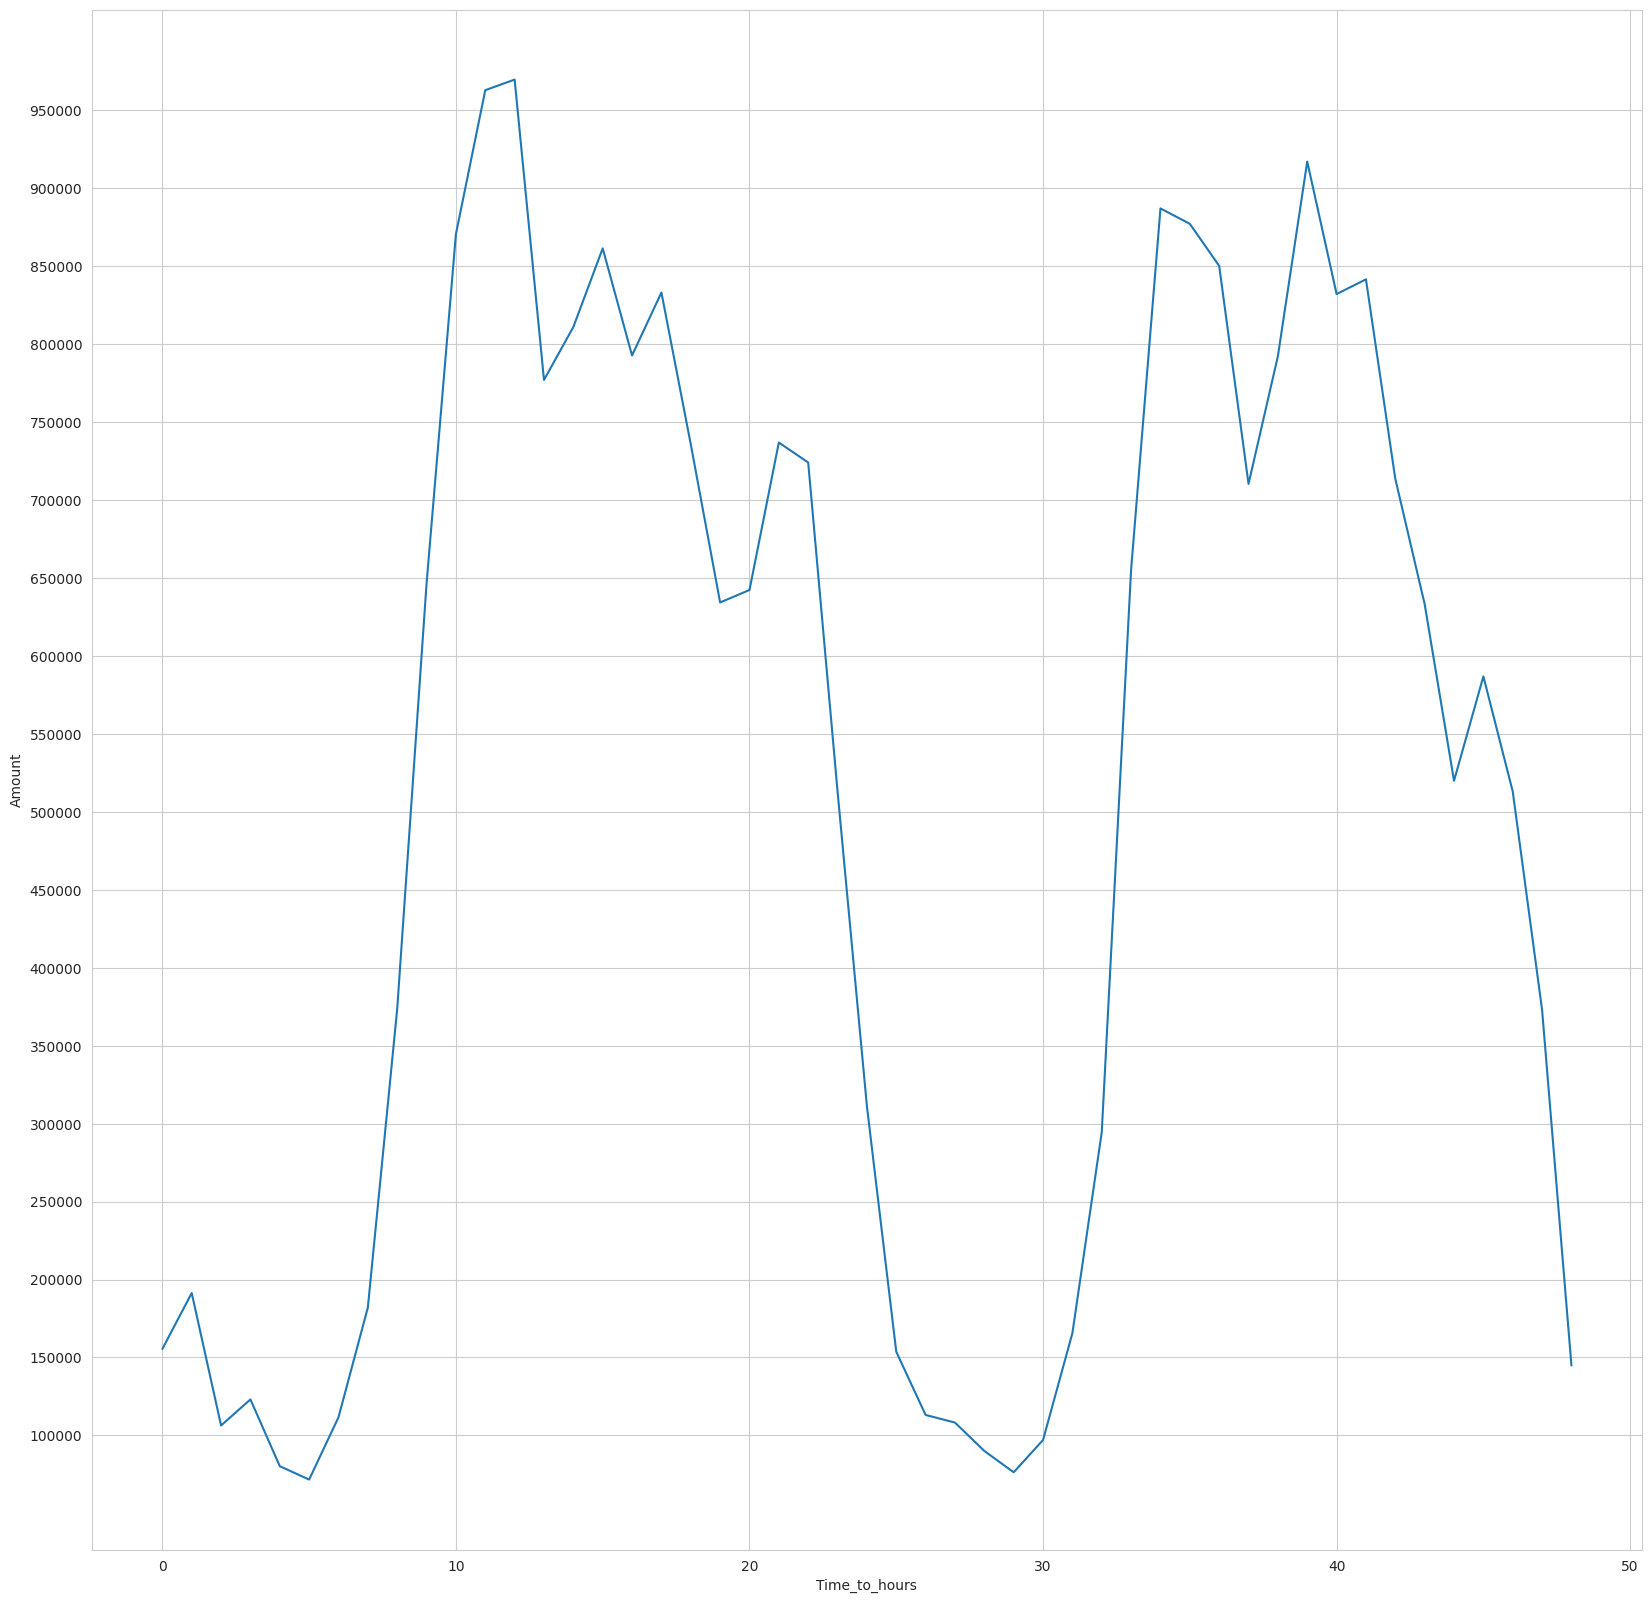

In [240]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
sns.lineplot(data=Amounts_by_hour)
plt.yticks(np.arange(100000,1000000,50000))


Examine Amount distribution differences between fraud and legitimate transactions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


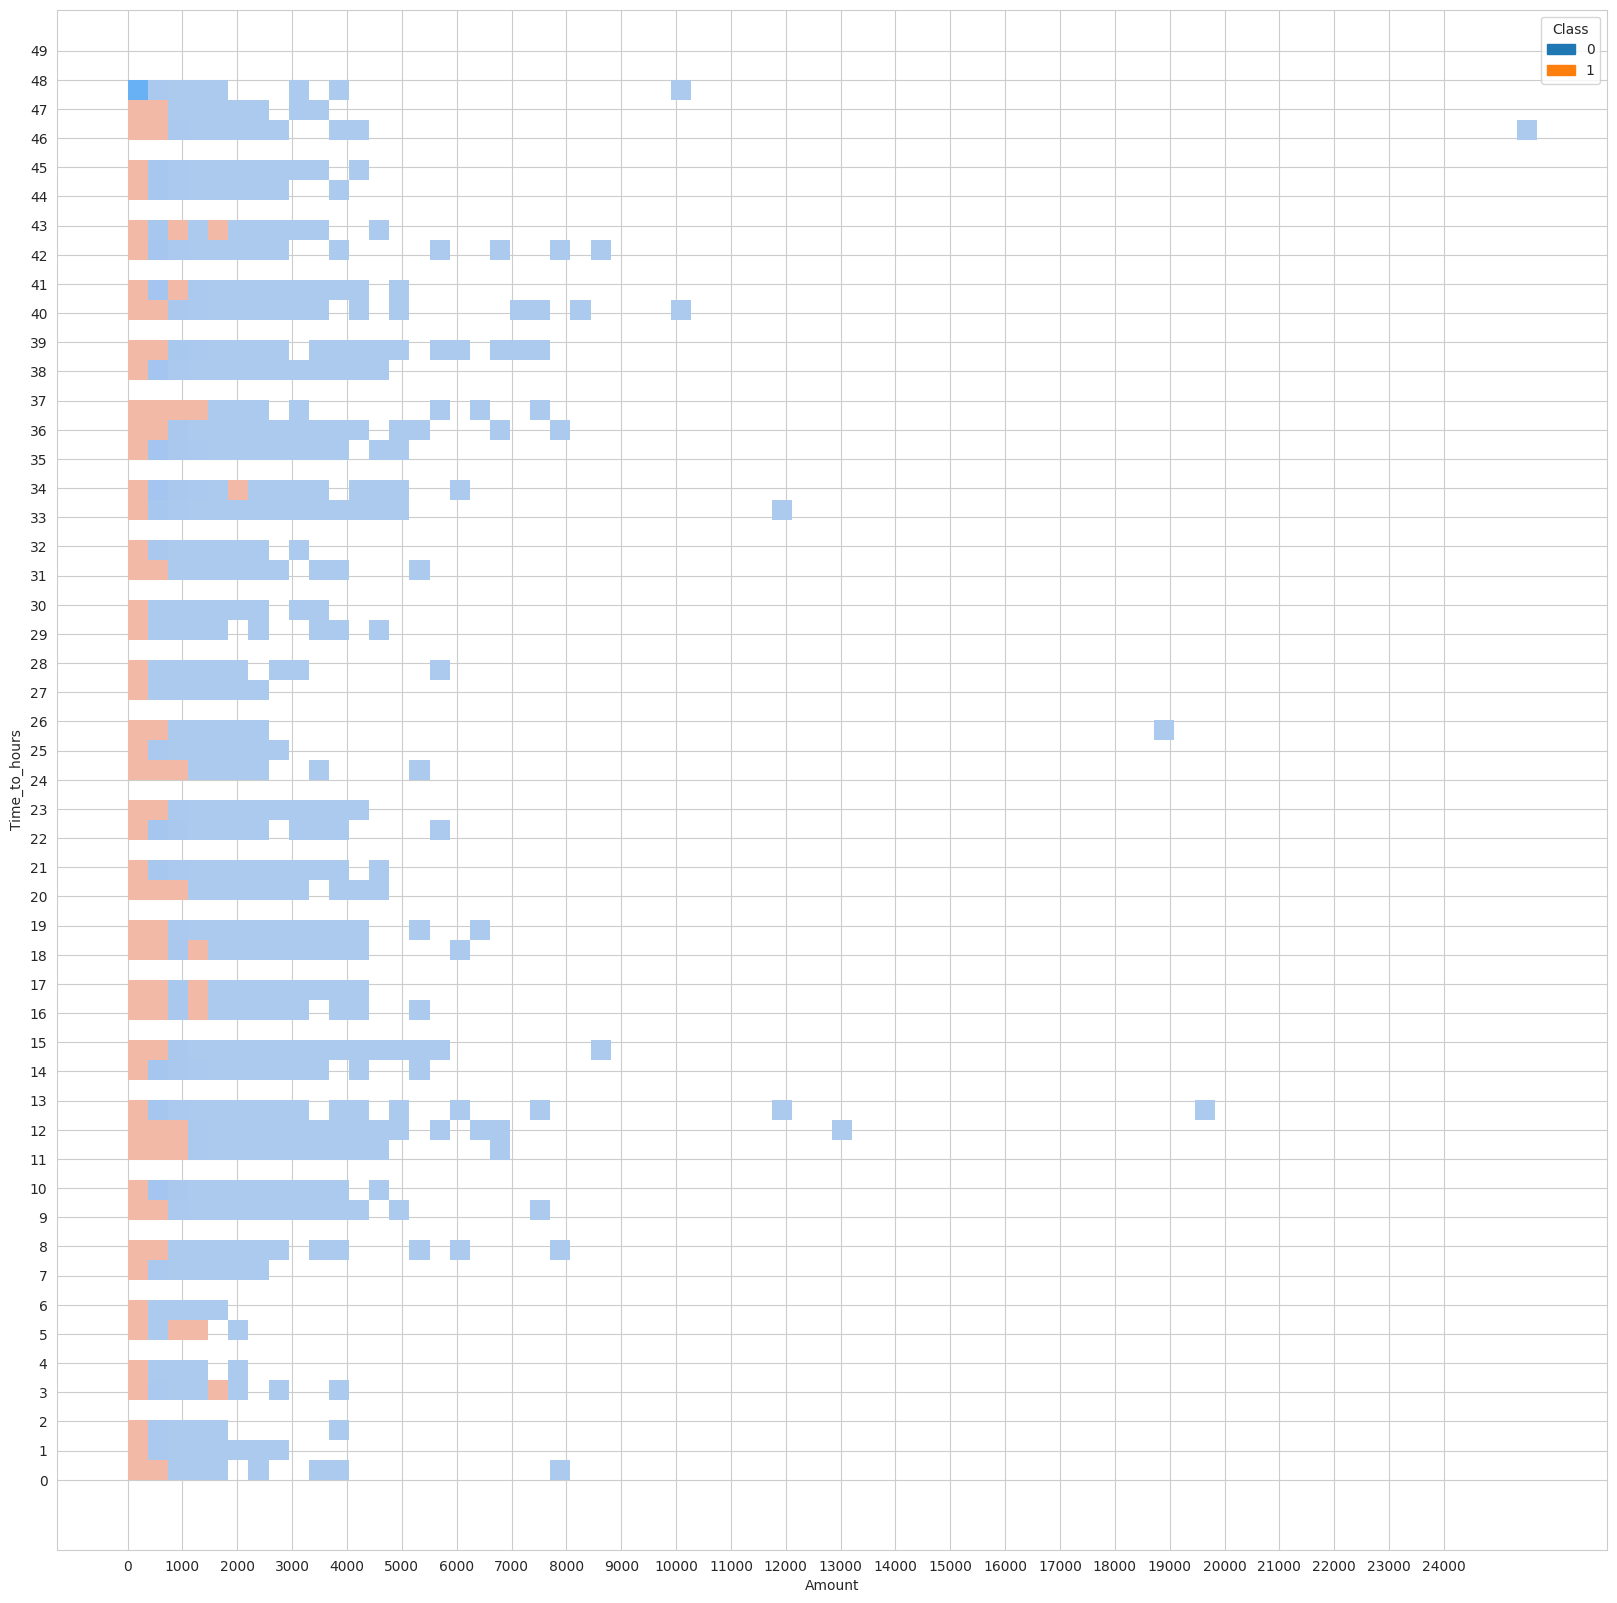

In [241]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
sns.histplot(data=df,y='Time_to_hours', x="Amount", bins=70, hue="Class",kde=True)
plt.xticks(np.arange(0,25000,1000))
plt.yticks(np.arange(0,50,1))
plt.show()

**1.3 Data Quality Assessment**

Check for missing values and understand why they might occur

In [242]:
df.isnull().sum()

Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
Time_to_hours    0
dtype: int64

Identify outliers using multiple methods (IQR, Z-score)

<Axes: >

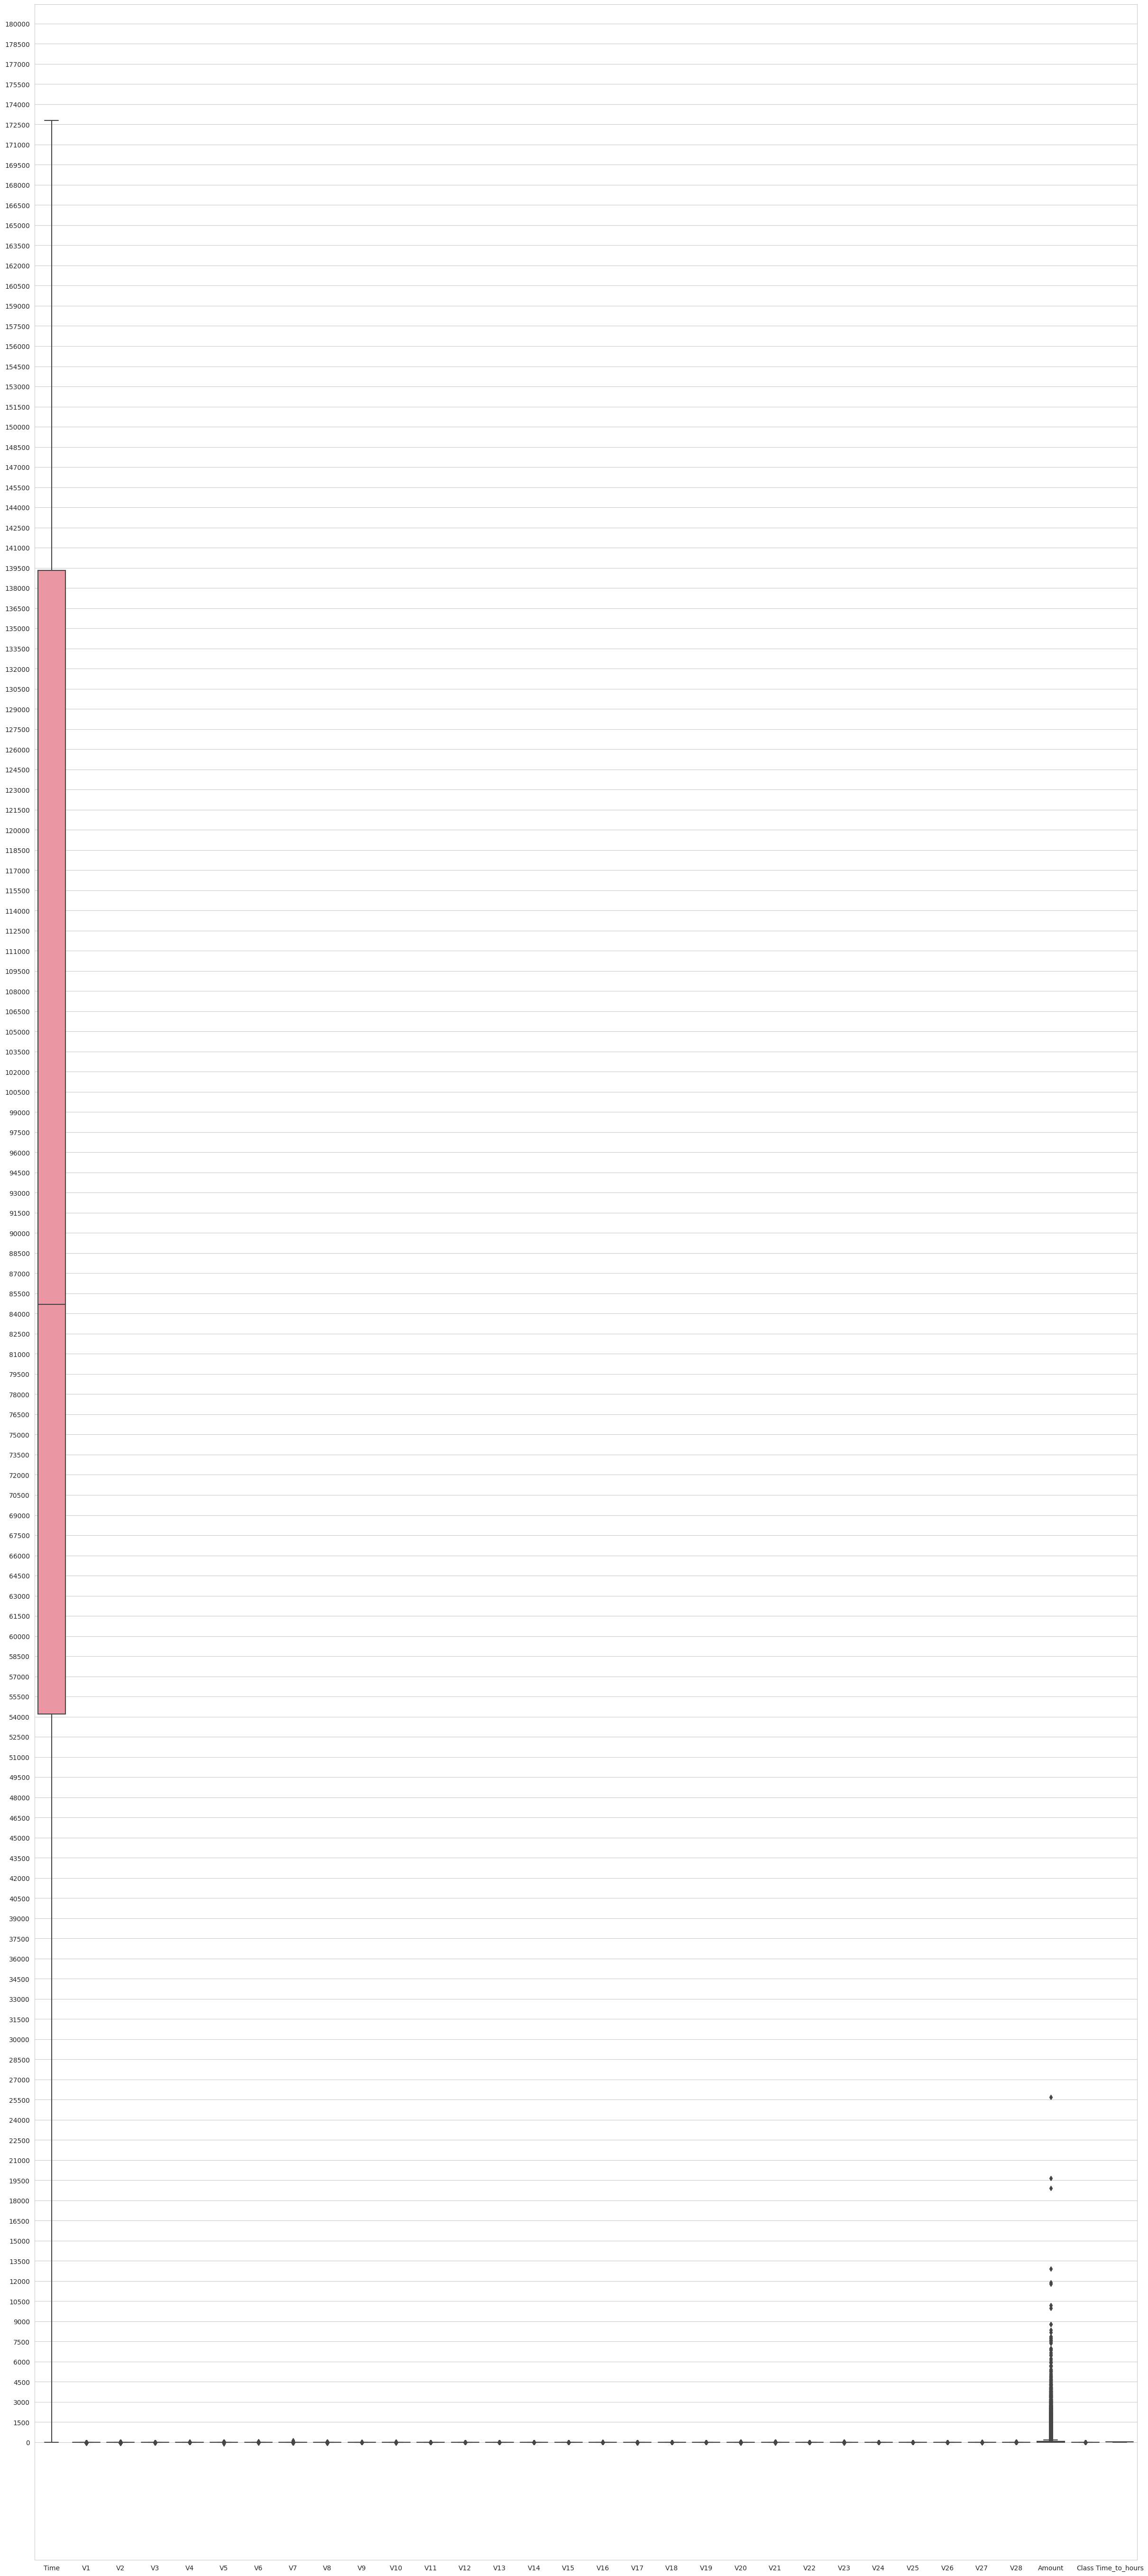

In [243]:
plt.figure(figsize=(30,70))
plt.yticks(np.arange(0,250000,1500))
sns.boxplot(data=df)


In [244]:
Q1=df['Amount'].quantile(0.25)
Q3=df['Amount'].quantile(0.75)

In [245]:

IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers_iqr = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
outliers_iqr

Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85          55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
...          ...       ...       ...       ...       ...       ...       ...   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V22       V23       V24  \
2       0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281   
20     -0.878586  0.445290 -0.446196  ... -0.571955 -0.050881 -0.304215   
51      4.371691 -2.006868 -0.278736  ... -0.381671  0.969719  0.019445   
64      1.559849 -0.399579 -0.479813  ...  1.011543  0.069666  0.157820   
85     -2.705393  0.666451  1.922216  ...  0.853360 -0.971600 -0.114862   
...          ...       ...       ...  ...       ...       ...       ...   
284735 -0.248881 -0.857361  0.137784  ... -0.257828 -0.072471 -1.035804   
284748  0.459925 -0.336879  0.743676  ... -0.493594  0.001993  0.602533   
284753  1.508074 -0.625691 -0.369824  ...  0.870491 -0.495410  0.676929   
284757  0.173241  0.364812  1.143381  ... -0.432979 -0.292549 -0.281494   
284806  1.577006 -0.414650  0.486180  ...  0.643078  0.376777  0.008797   

             V25       V26       V27       V28   Amount  Class  Time_to_hours  
2      -0.327642 -0.139097 -0.055353 -0.059752   378.66      0            0.0  
20      0.072001 -0.422234  0.086553  0.063499   231.71      0            0.0  
51      0.570923  0.333278  0.857373 -0.075538  1402.95      0            0.0  
64     -1.109224 -0.302369  0.318170  0.316910   243.66      0            0.0  
85      0.408300 -0.304576  0.547785 -0.456297   200.01      0            0.0  
...          ...       ...       ...       ...      ...    ...            ...  
284735 -0.437889 -0.238543  0.365302 -0.448621   381.05      0           48.0  
284748 -0.049936 -0.145522 -0.040554  0.024884   220.28      0           48.0  
284753  0.787688 -0.254918 -0.117200 -0.014737   337.54      0           48.0  
284757 -0.484349  0.366751 -0.102628 -0.458915   200.00      0           48.0  
284806 -0.473649 -0.818267 -0.002415  0.013649   217.00      0           48.0  

[31904 rows x 32 columns]

In [246]:
df['outlier_flag_quantile'] = ((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)).astype(int)

In [247]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.110474  0.066928   
1      -0.082361 -0.078803  0.085102 -0.255425  ...  0.101288 -0.339846   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.909412 -0.689281   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.190321 -1.175575   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.137458  0.141267   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.014480 -0.509348   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.012463 -1.016226   
284804  3.031260 -0.296827  0.708417  0.432454  ... -0.037501  0.640134   
284805  0.623708 -0.686180  0.679145  0.392087  ... -0.163298  0.123205   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  Time_to_hours  \
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0            0.0   
1       0.167170  0.125895 -0.008983  0.014724    2.69      0            0.0   
2      -0.327642 -0.139097 -0.055353 -0.059752  378.66      0            0.0   
3       0.647376 -0.221929  0.062723  0.061458  123.50      0            0.0   
4      -0.206010  0.502292  0.219422  0.215153   69.99      0            0.0   
...          ...       ...       ...       ...     ...    ...            ...   
284802  1.436807  0.250034  0.943651  0.823731    0.77      0           48.0   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0           48.0   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0           48.0   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0           48.0   
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0           48.0   

        outlier_flag_quantile  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0  
...                       ...  
284802                      0  
284803                      0  
284804                      0  
284805                      0  
284806                      1  

[284807 rows x 33 columns]

In [248]:
mean = df['Amount'].mean()
std = df['Amount'].std()

z_scores = (df['Amount'] - mean) / std
outliers_z = df[np.abs(z_scores) > 3]
outliers_z

Time        V1         V2         V3        V4         V5  \
51          36.0 -1.004929  -0.985978  -0.038039  3.710061  -6.631951   
89          59.0 -0.773293  -4.146007  -0.932038  0.027094  -1.698307   
140         87.0 -5.101877   1.897022  -3.458034 -1.277543  -5.517758   
150         93.0 -1.640014  -0.479831   1.613630  2.997979  -3.803788   
164        103.0 -6.093248 -12.114213  -5.694973  3.294389  -1.413792   
...          ...       ...        ...        ...       ...        ...   
284249  172273.0 -9.030538 -11.112584 -16.233798  3.592021 -40.427726   
284290  172305.0  0.311762  -2.602832  -2.942923  1.880832  -0.090804   
284383  172397.0 -0.065120  -4.114668  -2.106854 -0.137339  -1.384530   
284497  172498.0 -0.801222  -4.874934  -3.195666  1.177224  -1.299393   
284528  172527.0  0.643223  -3.380753  -3.890511 -0.386292  -0.266371   

               V6         V7        V8        V9  ...       V23       V24  \
51       5.122103   4.371691 -2.006868 -0.278736  ...  0.969719  0.019445   
89       0.460188   0.737344 -0.314216 -0.842673  ... -1.134769 -0.654958   
140      2.098366   3.329603  1.250966  0.271501  ... -0.555900 -0.761660   
150      5.051812   3.315254 -0.303785  0.671395  ... -0.405779 -1.268700   
164      4.776000   4.808426 -0.228197 -0.525896  ... -3.553381  1.215279   
...           ...        ...       ...       ...  ...       ...       ...   
284249  23.917837  44.054461 -7.277778 -4.210637  ...  7.040028  0.347693   
284290  -0.480139   1.865720 -0.549267 -0.303862  ... -0.913711 -0.332605   
284383   0.239999   0.893833 -0.257922  1.145888  ... -0.686403 -0.963878   
284497  -0.397073   2.192428 -0.603173  0.358854  ... -1.160277 -0.266300   
284528  -0.822619   1.514705 -0.729189 -0.901784  ... -1.051281  0.140447   

             V25       V26       V27       V28    Amount  Class  \
51      0.570923  0.333278  0.857373 -0.075538   1402.95      0   
89      0.098386 -0.209150 -0.171709  0.208057   1142.02      0   
140     0.066611  0.767227  0.731634 -0.860310    919.60      0   
150     0.494090  0.610967  0.608993 -0.410034    937.69      0   
164    -0.406073 -0.653384 -0.711222  0.672900   3828.04      0   
...          ...       ...       ...       ...       ...    ...   
284249  2.520869  2.342495  3.478175 -2.713136  10199.44      0   
284290  0.278026 -0.474820 -0.200782  0.073386    897.00      0   
284383 -0.924685  0.210599 -0.253408  0.125687   1114.00      0   
284497 -0.523929 -0.233779 -0.338745  0.180252   1484.66      0   
284528  0.508555  0.220468 -0.278604  0.058006    900.00      0   

        Time_to_hours  outlier_flag_quantile  
51                0.0                      1  
89                0.0                      1  
140               0.0                      1  
150               0.0                      1  
164               0.0                      1  
...               ...                    ...  
284249           48.0                      1  
284290           48.0                      1  
284383           48.0                      1  
284497           48.0                      1  
284528           48.0                      1  

[4076 rows x 33 columns]

Analyze the relationship between outliers and fraudulent transactions

In [249]:
outliers_z_fraud=outliers_z[outliers_z['Class']==1]
outliers_z_fraud

Time         V1        V2         V3        V4        V5  \
6971      9064.0  -3.499108  0.258555  -4.489558  4.853894 -6.974522   
10690    18088.0 -12.224021  3.854150 -12.466766  9.648311 -2.726961   
81609    59011.0  -2.326922 -3.348439  -3.513408  3.175060 -2.815137   
89190    62467.0  -5.344665 -0.285760  -3.835616  5.337048 -7.609909   
95597    65385.0  -2.923827  1.524837  -3.018758  3.289291 -5.755542   
176049  122608.0  -2.003460 -7.159042  -4.050976  1.309580 -2.058102   
199896  133184.0  -1.212682 -2.484824  -6.397186  3.670562 -0.863375   
203328  134769.0  -0.967767  2.098019  -5.222929  6.514573 -4.187674   
233258  147501.0  -1.611877 -0.408410  -3.829762  6.249462 -3.360922   
249167  154278.0  -1.600211 -3.488130  -6.459303  3.246816 -1.614608   
249239  154309.0  -0.082983 -3.935919  -2.616709  0.163310 -1.400952   

              V6         V7        V8        V9  ...        V23       V24  \
6971    3.628382   5.431271 -1.946734 -0.775680  ...  -2.119007  0.170279   
10690  -4.445610 -21.922811  0.320792 -4.433162  ... -19.254328  0.544867   
81609  -0.203363  -0.892144  0.333226 -0.802005  ...  -1.478490 -0.061553   
89190   3.874668   1.289630  0.201742 -3.003532  ...  -1.016579 -0.071361   
95597   2.218276  -0.509995 -3.569444 -1.016592  ...  -4.288639  0.563797   
176049 -0.098621   2.880083 -0.727484  1.460381  ...  -1.800985  0.657586   
199896 -1.855855   1.017732 -0.544704 -1.703378  ...  -1.492882 -0.204227   
203328  2.114178   0.948701 -2.448427 -3.203666  ...   1.314312 -0.352887   
233258  1.147964   1.858425  0.474858 -3.838399  ...   2.251439 -0.066096   
249167 -1.260375   0.288223 -0.048964 -0.734975  ...  -1.463421 -0.624231   
249239 -0.809419   1.501580 -0.471000  1.519743  ...  -0.921017  0.111635   

             V25       V26       V27       V28   Amount  Class  Time_to_hours  \
6971   -0.393844  0.296367  1.985913 -0.900452  1809.68      1            3.0   
10690  -4.781606 -0.007772  3.052358 -0.775036  1218.89      1            5.0   
81609   0.236155  0.531911  0.302324  0.536375  1389.56      1           16.0   
89190  -0.335869  0.441044  1.520613 -1.115937  1402.16      1           17.0   
95597  -0.949451 -0.204532  1.510206 -0.324706  1354.25      1           18.0   
176049 -0.435617 -0.894509 -0.397557  0.314262  2125.87      1           34.0   
199896  0.532511 -0.293871  0.212663  0.431095  1335.00      1           37.0   
203328 -1.770706  0.098133  0.956769  0.162777   925.31      1           37.0   
233258  0.538710  0.541325 -0.136243 -0.009852   996.27      1           41.0   
249167 -0.176462  0.400348  0.152947  0.477775  1504.93      1           43.0   
249239 -0.071622 -1.125881 -0.170947  0.126221  1096.99      1           43.0   

        outlier_flag_quantile  
6971                        1  
10690                       1  
81609                       1  
89190                       1  
95597                       1  
176049                      1  
199896                      1  
203328                      1  
233258                      1  
249167                      1  
249239                      1  

[11 rows x 33 columns]

Analyze the relationship between outliers and fraudulent transactions

In [250]:
df_outliers_IQR_fraud=df[(df['Class']==1) & (df['outlier_flag_quantile']==1)]
df_outliers_IQR_fraud

Time         V1        V2         V3        V4         V5  \
623        472.0  -3.043541 -3.157307   1.088463  2.288644   1.359805   
4920      4462.0  -2.303350  1.759247  -0.359745  2.330243  -0.821628   
6971      9064.0  -3.499108  0.258555  -4.489558  4.853894  -6.974522   
10630    17838.0  -5.187878  6.967709 -13.510931  8.617895 -11.214422   
10690    18088.0 -12.224021  3.854150 -12.466766  9.648311  -2.726961   
...          ...        ...       ...        ...       ...        ...   
258403  158638.0  -5.976119 -7.196980  -5.388316  5.104799   4.676533   
275992  166831.0  -2.027135 -1.131890  -1.135194  1.086963  -0.010547   
276864  167338.0  -1.374424  2.793185  -4.346572  2.400731  -1.688433   
279863  169142.0  -1.927883  1.125653  -4.518331  1.749293  -1.566487   
281144  169966.0  -3.113832  0.585864  -5.399730  1.817092  -0.840618   

              V6         V7        V8        V9  ...        V23       V24  \
623    -1.064823   0.325574 -0.067794 -0.270953  ...   1.375966 -0.293803   
4920   -0.075788   0.562320 -0.399147 -0.238253  ...   0.172726 -0.087330   
6971    3.628382   5.431271 -1.946734 -0.775680  ...  -2.119007  0.170279   
10630   0.672248  -9.462533  5.328704 -4.897006  ...   0.716806 -0.646743   
10690  -4.445610 -21.922811  0.320792 -4.433162  ... -19.254328  0.544867   
...          ...        ...       ...       ...  ...        ...       ...   
258403 -5.566870  -4.291180  0.876531 -1.075478  ...   0.848177 -0.269916   
275992  0.423797   3.790880 -1.155595 -0.063434  ...   0.490842  0.756502   
276864  0.111136  -0.922038 -2.149930 -2.027474  ...   0.137994  0.368275   
279863 -2.010494  -0.882850  0.697211 -2.064945  ...   0.639419 -0.294885   
281144 -2.943548  -2.208002  1.058733 -1.632333  ...  -0.456108 -0.183659   

             V25       V26       V27       V28   Amount  Class  Time_to_hours  \
623     0.279798 -0.145362 -0.252773  0.035764   529.00      1            0.0   
4920   -0.156114 -0.542628  0.039566 -0.153029   239.93      1            1.0   
6971   -0.393844  0.296367  1.985913 -0.900452  1809.68      1            3.0   
10630  -1.617043  0.172347  0.626647 -0.169726   766.36      1            5.0   
10690  -4.781606 -0.007772  3.052358 -0.775036  1218.89      1            5.0   
...          ...       ...       ...       ...      ...    ...            ...   
258403 -1.095060 -0.710905  0.565846 -1.034107   296.00      1           44.0   
275992 -0.142685 -0.602777  0.508712 -0.091646   634.30      1           46.0   
276864  0.103137 -0.414209  0.454982  0.096711   349.08      1           46.0   
279863  0.537503  0.788395  0.292680  0.147968   390.00      1           47.0   
281144 -0.328168  0.606116  0.884876 -0.253700   245.00      1           47.0   

        outlier_flag_quantile  
623                         1  
4920                        1  
6971                        1  
10630                       1  
10690                       1  
...                       ...  
258403                      1  
275992                      1  
276864                      1  
279863                      1  
281144                      1  

[91 rows x 33 columns]

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

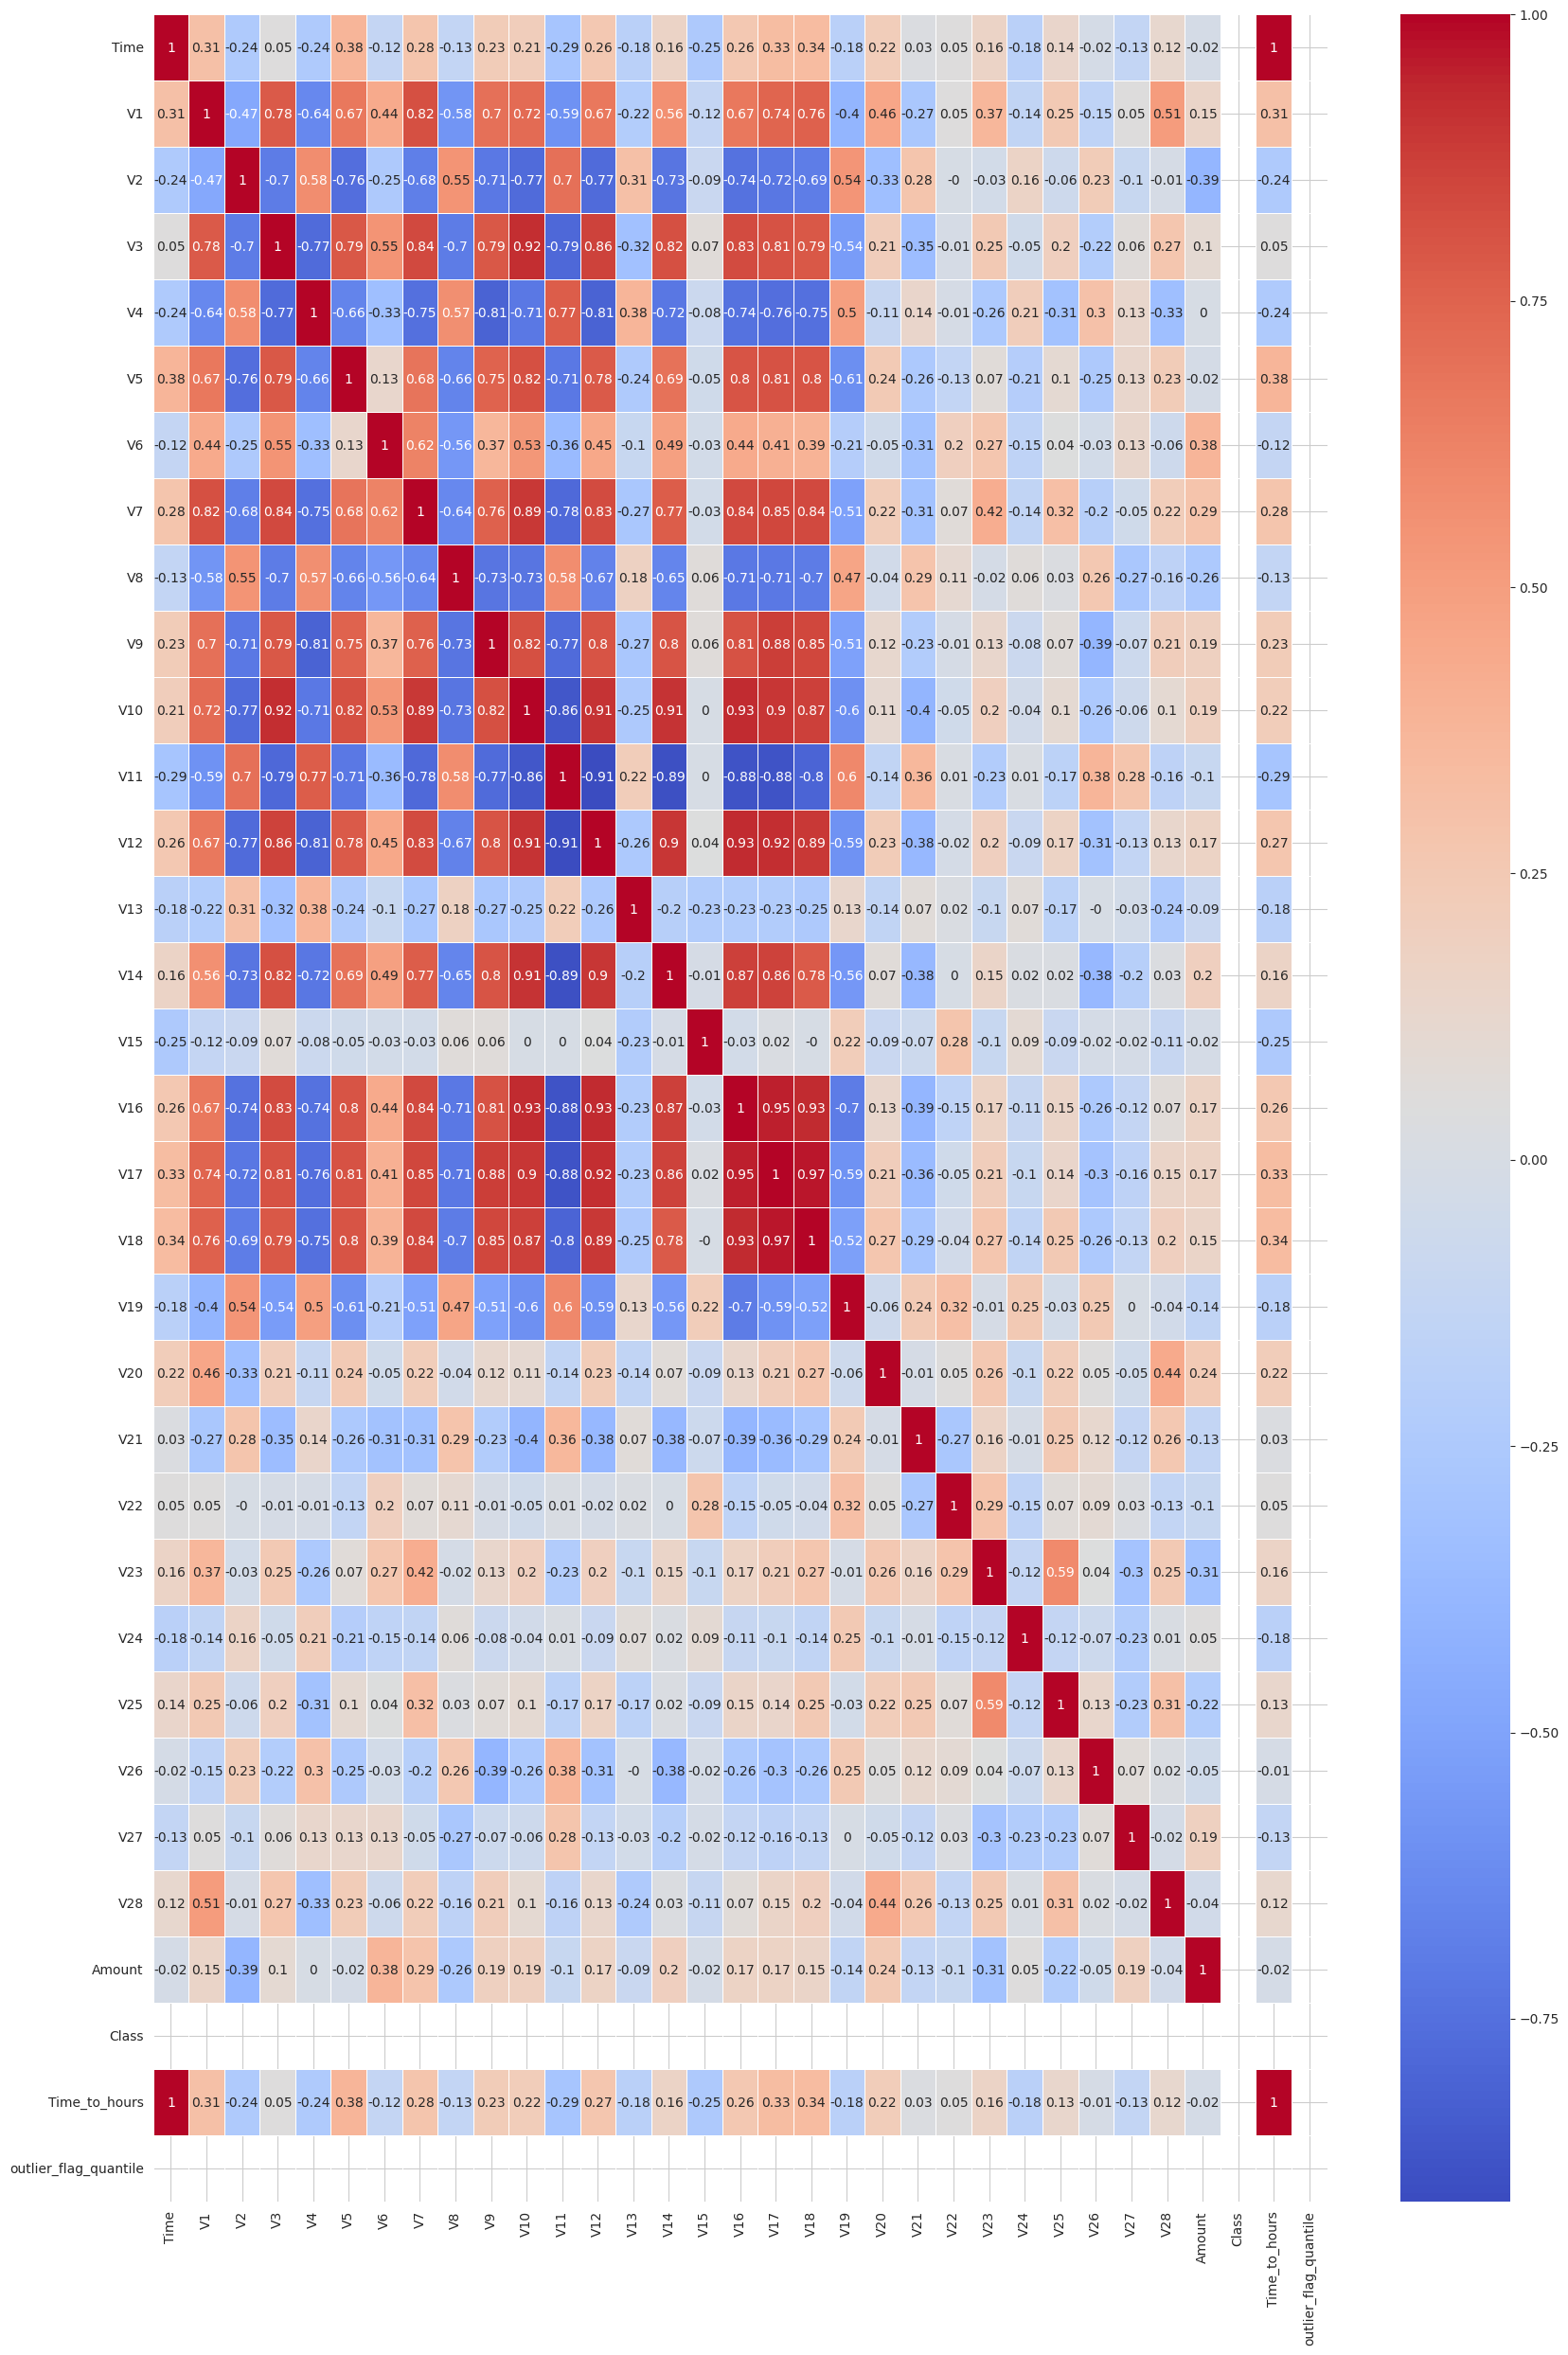

In [251]:
df_outliers_IQR_fraud.corr(method="pearson")
plt.figure(figsize=(20,30))
sns.heatmap(round(df_outliers_IQR_fraud.corr(method="pearson"),2),annot=True,cmap='coolwarm',linewidth=0.7)

Create outlier detection visualizations (scatter plots, box plots)

<Axes: >

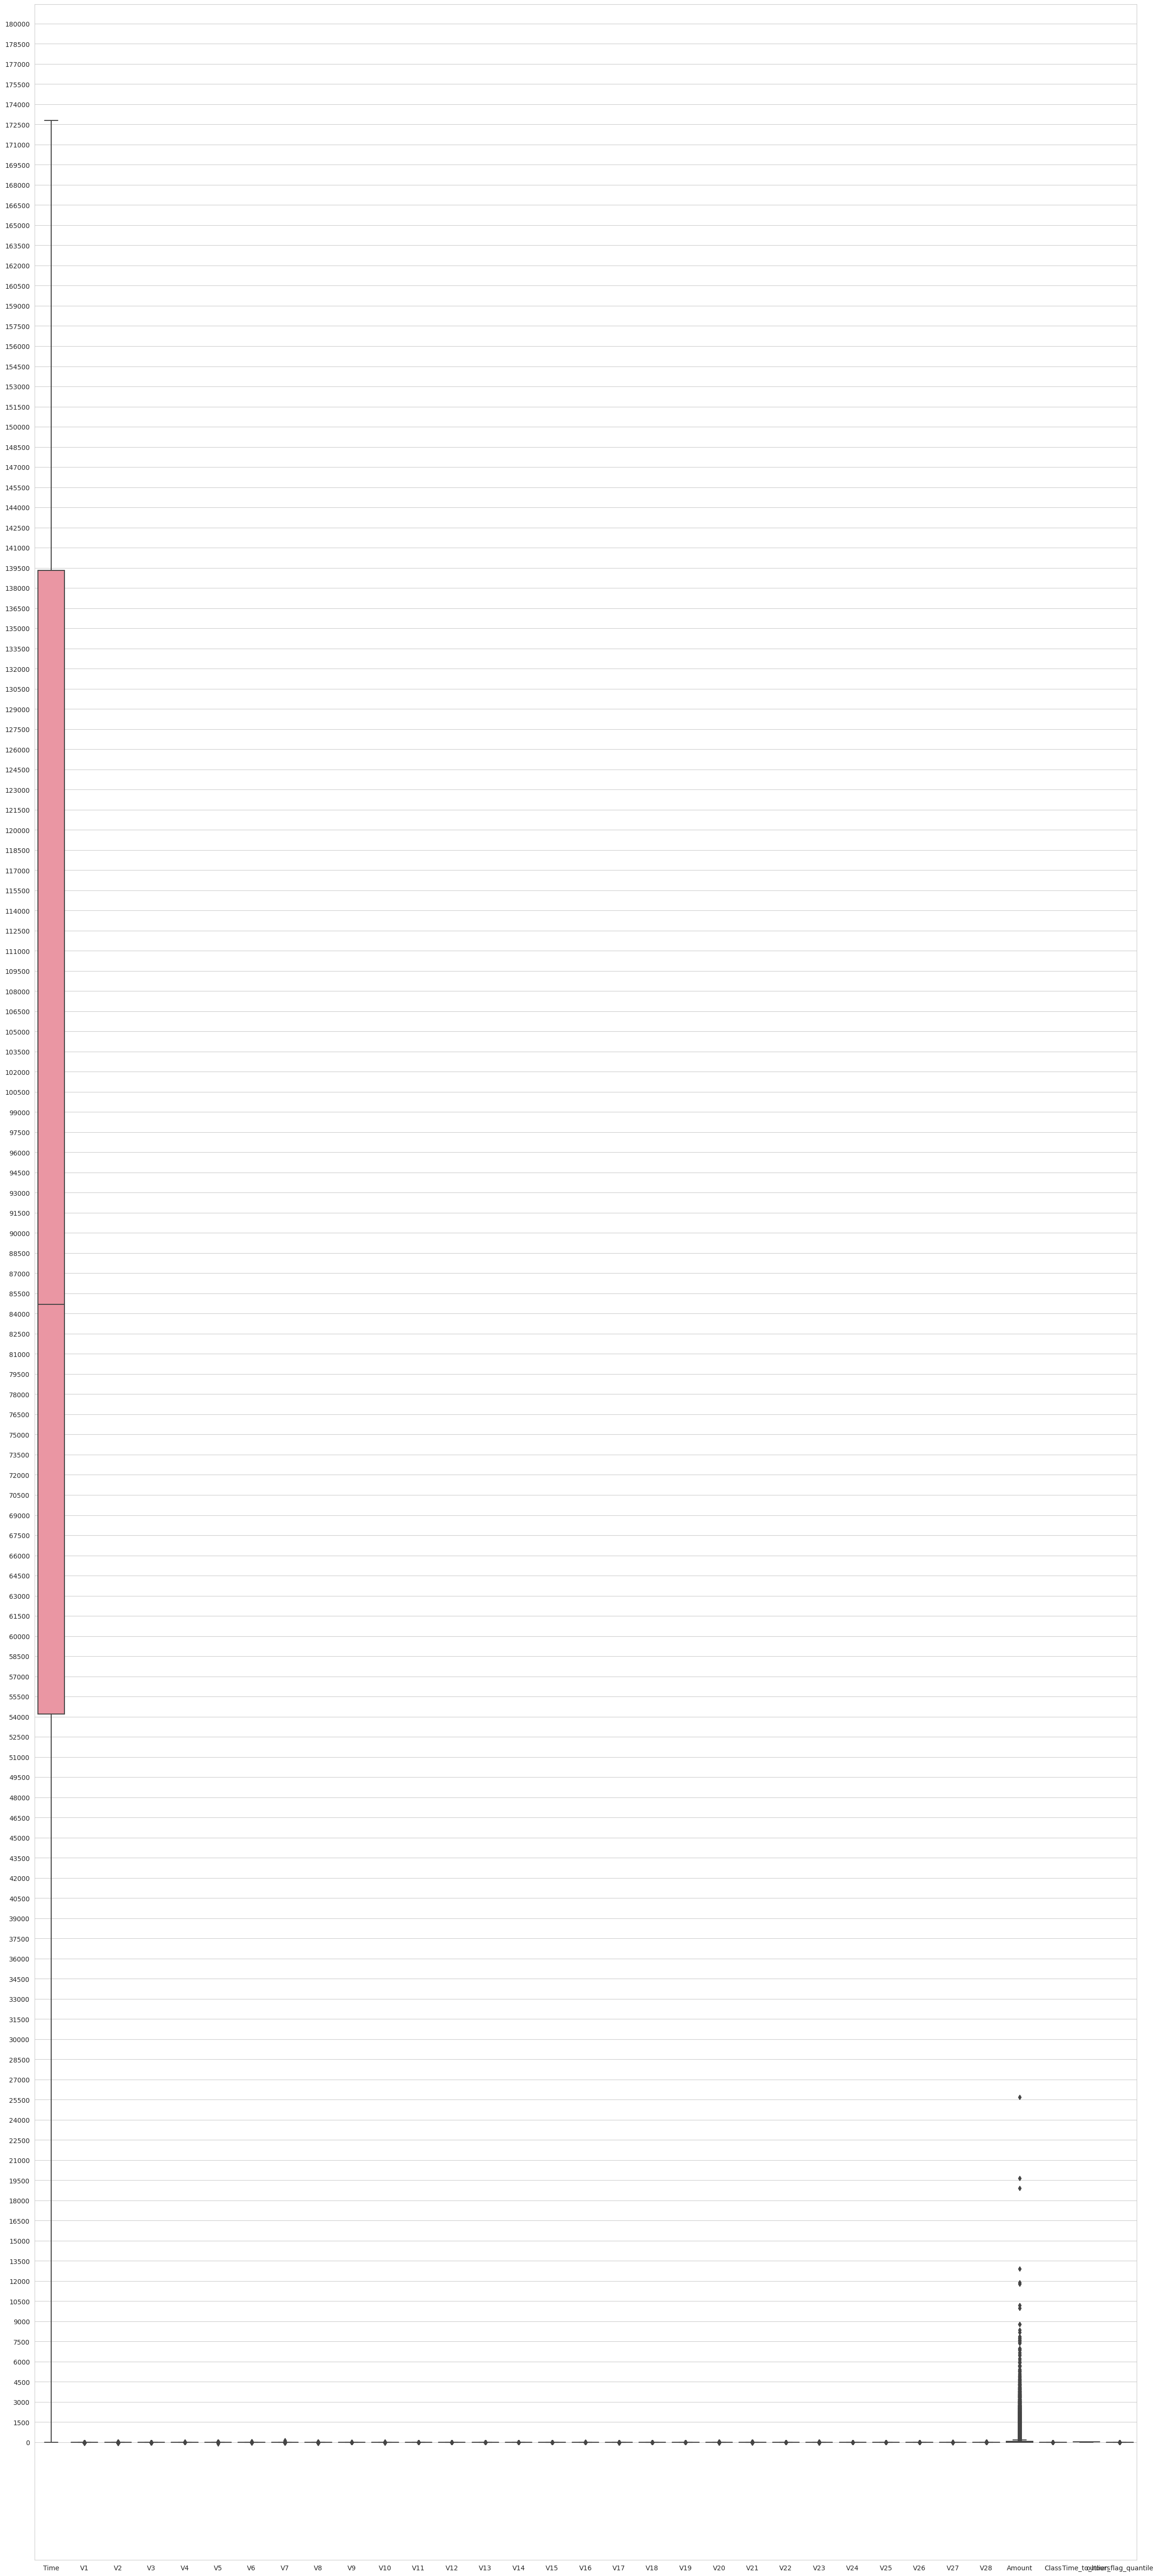

In [252]:
plt.figure(figsize=(30,70))
plt.yticks(np.arange(0,250000,1500))
sns.boxplot(data=df)


<Axes: xlabel='Amount', ylabel='Time_to_hours'>

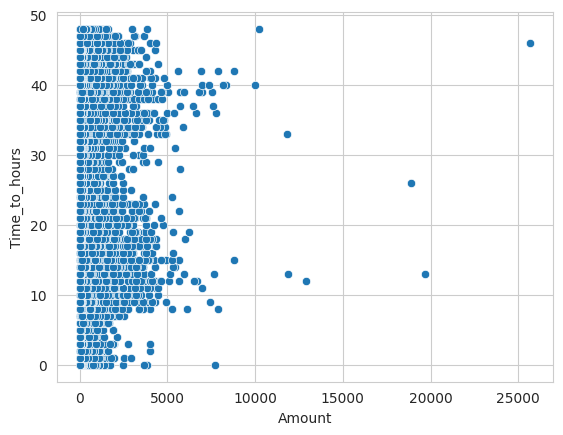

In [253]:
sns.scatterplot(data=df,x='Amount',y='Time_to_hours')

Document patterns in anomalous transactions

Deliverable: Comprehensive EDA notebook with visualizations, statistical analysis, and written 
insights about data quality issues and fraud patterns.

# Task 2: Data Preprocessing and Feature Engineering

**2.1 Handling Class Imbalance**

Calculate exact imbalance ratio and discuss impact on model performance

In [254]:
class_0= df['Class'].value_counts()[0]/df['Class'].value_counts().sum()*100
class_1=df['Class'].value_counts()[1]/df['Class'].value_counts().sum()*100
print(f'Class 0 is {np.round(class_0,4)}%,\nbut class 1 is {np.round(class_1,4)}%')

Class 0 is 99.8273%,
but class 1 is 0.1727%


Implement and compare multiple resampling techniques 

Random undersampling of majority class

In [255]:
!pip install imblearn

In [256]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.2

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier   
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [258]:
data=df.drop(columns='Time',inplace=False)
data

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V23       V24  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.110474  0.066928   
1      -0.078803  0.085102 -0.255425 -0.166974  ...  0.101288 -0.339846   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.909412 -0.689281   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.190321 -1.175575   
4       0.592941 -0.270533  0.817739  0.753074  ... -0.137458  0.141267   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  1.014480 -0.509348   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.012463 -1.016226   
284804 -0.296827  0.708417  0.432454 -0.484782  ... -0.037501  0.640134   
284805 -0.686180  0.679145  0.392087 -0.399126  ... -0.163298  0.123205   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  Time_to_hours  \
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0            0.0   
1       0.167170  0.125895 -0.008983  0.014724    2.69      0            0.0   
2      -0.327642 -0.139097 -0.055353 -0.059752  378.66      0            0.0   
3       0.647376 -0.221929  0.062723  0.061458  123.50      0            0.0   
4      -0.206010  0.502292  0.219422  0.215153   69.99      0            0.0   
...          ...       ...       ...       ...     ...    ...            ...   
284802  1.436807  0.250034  0.943651  0.823731    0.77      0           48.0   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0           48.0   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0           48.0   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0           48.0   
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0           48.0   

        outlier_flag_quantile  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0  
...                       ...  
284802                      0  
284803                      0  
284804                      0  
284805                      0  
284806                      1  

[284807 rows x 32 columns]

In [259]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_to_hours', 'outlier_flag_quantile'],
      dtype='object')

In [260]:
X=data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_to_hours', 'outlier_flag_quantile']]
y=data['Class']


In [261]:
X

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V22       V23  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.277838 -0.110474   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.771679  0.909412   
3       0.237609  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321   
4       0.592941 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  0.111864  1.014480   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.924384  0.012463   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  \
0       0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1      -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2      -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4       0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...     ...   
284802 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Time_to_hours  outlier_flag_quantile  
0                 0.0                      0  
1                 0.0                      0  
2                 0.0                      1  
3                 0.0                      0  
4                 0.0                      0  
...               ...                    ...  
284802           48.0                      0  
284803           48.0                      0  
284804           48.0                      0  
284805           48.0                      0  
284806           48.0                      1  

[284807 rows x 31 columns]

In [262]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [263]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [265]:
Rus=RandomUnderSampler(random_state=42,sampling_strategy=0.04)
X_rus,y_rus=Rus.fit_resample(X_train,y_train)

([<matplotlib.patches.Wedge at 0x7b1e06d8e710>,
 [Text(-1.0919797500487745, 0.13259044265487704, 'legitemate'),
  Text(1.0919797391865094, -0.13259053211358374, 'fraud')],
 [Text(-0.5956253182084223, 0.07232205962993292, '96.15%'),
  Text(0.5956253122835504, -0.07232210842559113, '3.85%')])

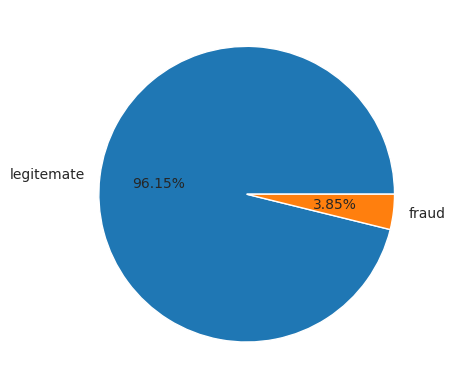

In [266]:
plt.pie(x=y_rus.value_counts(),labels=['legitemate','fraud'],autopct='%1.2f%%')


In [267]:
Ros=RandomOverSampler(random_state=42,sampling_strategy=0.04)
X_ros,y_ros=Ros.fit_resample(X_train,y_train)

([<matplotlib.patches.Wedge at 0x7b1e06ee3bd0>,
 [Text(-1.091981239661434, 0.13257817402377445, 'legitemate'),
  Text(1.0919812474194723, -0.13257811012461063, 'fraud')],
 [Text(-0.5956261307244185, 0.07231536764933151, '96.15%'),
  Text(0.5956261349560757, -0.07231533279524215, '3.85%')])

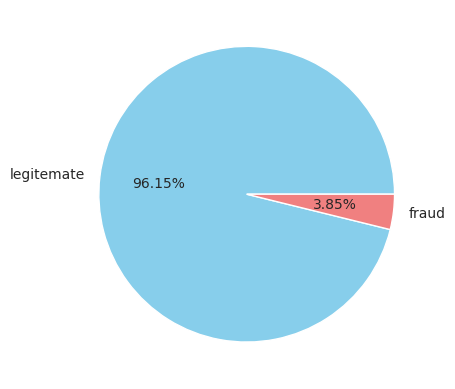

In [268]:
plt.pie(x=y_ros.value_counts(),labels=['legitemate','fraud'],autopct='%1.2f%%',colors=['skyblue','lightcoral'])


In [269]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42,sampling_strategy=0.04)
X_smote,y_smote=smote.fit_resample(X_train,y_train)

([<matplotlib.patches.Wedge at 0x7b1e3c6387d0>,
 [Text(-1.091981239661434, 0.13257817402377445, 'legitemate'),
  Text(1.0919812474194723, -0.13257811012461063, 'fraud')],
 [Text(-0.5956261307244185, 0.07231536764933151, '96.15%'),
  Text(0.5956261349560757, -0.07231533279524215, '3.85%')])

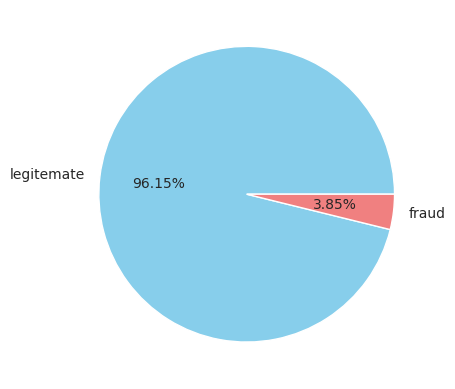

In [270]:
plt.pie(x=y_smote.value_counts(),labels=['legitemate','fraud'],autopct='%1.2f%%',colors=['skyblue','lightcoral'])

In [271]:
'''from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_sm_to y_sm_to = smote_tomek.fit_resample(X_train, y_train)
'''


'from imblearn.combine import SMOTETomek\nsmote_tomek = SMOTETomek(random_state=42)\nX_sm_to y_sm_to = smote_tomek.fit_resample(X_train, y_train)\n'

In [272]:
#plt.pie(x=y_sm_to.value_counts(),labels=['legitemte','fraud'],autopct='%1.2f%%',colors=['skyblue','lightcoral'])


In [273]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42,sampling_strategy=0.04)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

([<matplotlib.patches.Wedge at 0x7b1e3e2e5f90>,
 [Text(-1.0918939403764059, 0.13329524736195894, 'legitemate'),
  Text(1.0918939372564052, -0.133295272919581, 'fraud')],
 [Text(-0.595578512932585, 0.0727064985610685, '96.13%'),
  Text(0.5955785112307664, -0.07270651250158962, '3.87%')])

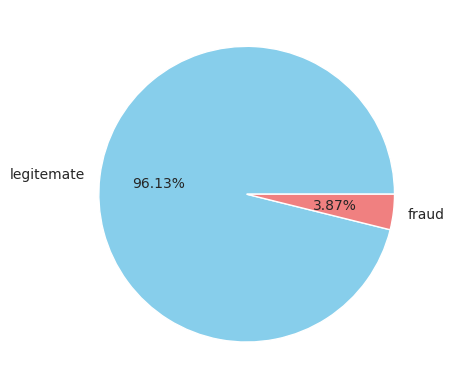

In [274]:
plt.pie(x=y_ada.value_counts(),labels=['legitemate','fraud'],autopct='%1.2f%%',colors=['skyblue','lightcoral'])


In [275]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_ros, y_ros)
y_pred = model.predict(X_test)

In [276]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8888888888888888
Recall: 0.8707482993197279


In [277]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8482142857142857
Recall: 0.6462585034013606


**2.2 Outlier Treatment**

Analyze which outliers are legitimate extreme values vs. data errors

In [279]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.110474  0.066928   
1      -0.082361 -0.078803  0.085102 -0.255425  ...  0.101288 -0.339846   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.909412 -0.689281   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.190321 -1.175575   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.137458  0.141267   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.014480 -0.509348   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.012463 -1.016226   
284804  3.031260 -0.296827  0.708417  0.432454  ... -0.037501  0.640134   
284805  0.623708 -0.686180  0.679145  0.392087  ... -0.163298  0.123205   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  Time_to_hours  \
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0            0.0   
1       0.167170  0.125895 -0.008983  0.014724    2.69      0            0.0   
2      -0.327642 -0.139097 -0.055353 -0.059752  378.66      0            0.0   
3       0.647376 -0.221929  0.062723  0.061458  123.50      0            0.0   
4      -0.206010  0.502292  0.219422  0.215153   69.99      0            0.0   
...          ...       ...       ...       ...     ...    ...            ...   
284802  1.436807  0.250034  0.943651  0.823731    0.77      0           48.0   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0           48.0   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0           48.0   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0           48.0   
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0           48.0   

        outlier_flag_quantile  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0  
...                       ...  
284802                      0  
284803                      0  
284804                      0  
284805                      0  
284806                      1  

[284807 rows x 33 columns]

In [280]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.110474  0.066928   
1      -0.082361 -0.078803  0.085102 -0.255425  ...  0.101288 -0.339846   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.909412 -0.689281   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.190321 -1.175575   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.137458  0.141267   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.014480 -0.509348   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.012463 -1.016226   
284804  3.031260 -0.296827  0.708417  0.432454  ... -0.037501  0.640134   
284805  0.623708 -0.686180  0.679145  0.392087  ... -0.163298  0.123205   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  Time_to_hours  \
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0            0.0   
1       0.167170  0.125895 -0.008983  0.014724    2.69      0            0.0   
2      -0.327642 -0.139097 -0.055353 -0.059752  378.66      0            0.0   
3       0.647376 -0.221929  0.062723  0.061458  123.50      0            0.0   
4      -0.206010  0.502292  0.219422  0.215153   69.99      0            0.0   
...          ...       ...       ...       ...     ...    ...            ...   
284802  1.436807  0.250034  0.943651  0.823731    0.77      0           48.0   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0           48.0   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0           48.0   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0           48.0   
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0           48.0   

        outlier_flag_quantile  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0  
...                       ...  
284802                      0  
284803                      0  
284804                      0  
284805                      0  
284806                      1  

[284807 rows x 33 columns]

In [281]:
df = df.drop(df[(df['Class'] == 1) & (df['outlier_flag_quantile'] == 1)].index)


In [282]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.110474  0.066928   
1      -0.082361 -0.078803  0.085102 -0.255425  ...  0.101288 -0.339846   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.909412 -0.689281   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.190321 -1.175575   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.137458  0.141267   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.014480 -0.509348   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.012463 -1.016226   
284804  3.031260 -0.296827  0.708417  0.432454  ... -0.037501  0.640134   
284805  0.623708 -0.686180  0.679145  0.392087  ... -0.163298  0.123205   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  Time_to_hours  \
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0            0.0   
1       0.167170  0.125895 -0.008983  0.014724    2.69      0            0.0   
2      -0.327642 -0.139097 -0.055353 -0.059752  378.66      0            0.0   
3       0.647376 -0.221929  0.062723  0.061458  123.50      0            0.0   
4      -0.206010  0.502292  0.219422  0.215153   69.99      0            0.0   
...          ...       ...       ...       ...     ...    ...            ...   
284802  1.436807  0.250034  0.943651  0.823731    0.77      0           48.0   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0           48.0   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0           48.0   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0           48.0   
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0           48.0   

        outlier_flag_quantile  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0  
...                       ...  
284802                      0  
284803                      0  
284804                      0  
284805                      0  
284806                      1  

[284716 rows x 33 columns]

In [283]:
df[df["Class"]==1]

Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
6331      7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6334      7535.0  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
...          ...       ...       ...       ...       ...       ...       ...   
274475  166028.0 -0.956390  2.361594 -3.171195  1.970759  0.474761 -1.902598   
276071  166883.0  2.091900 -0.757459 -1.192258 -0.755458 -0.620324 -0.322077   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V23       V24       V25  \
541    -2.537387  1.391657 -2.770089  ... -0.465211  0.320198  0.044519   
6108   -3.496197 -0.248778 -0.247768  ... -0.436207 -0.053502  0.252405   
6329    1.713445 -0.496358 -1.282858  ... -0.656805 -1.632653  1.488901   
6331   -1.631735  0.154612 -2.795892  ... -0.539528  0.128940  1.488481   
6334   -1.689102  0.303253 -3.139409  ... -0.669605 -0.759908  1.605056   
...          ...       ...       ...  ...       ...       ...       ...   
274475 -0.055178  0.277831 -1.745854  ...  0.122458 -0.255650 -0.619259   
276071 -1.082511  0.117200 -0.140927  ...  0.142007  0.592615 -0.196143   
280143 -1.413170  0.248525 -1.127396  ... -0.145640 -0.081049  0.521875   
280149 -2.234739  1.210158 -0.652250  ...  0.190944  0.032070 -0.739695   
281674  0.223050 -0.068384  0.577829  ... -0.072173 -0.450261  0.313267   

             V26       V27       V28  Amount  Class  Time_to_hours  \
541     0.177840  0.261145 -0.143276    0.00      1            0.0   
6108   -0.657488 -0.827136  0.849573   59.00      1            2.0   
6329    0.566797 -0.010016  0.146793    1.00      1            2.0   
6331    0.507963  0.735822  0.513574    1.00      1            2.0   
6334    0.540675  0.737040  0.496699    1.00      1            2.0   
...          ...       ...       ...     ...    ...            ...   
274475 -0.484280  0.683535  0.443299   39.90      1           46.0   
276071 -0.136676  0.020182 -0.015470   19.95      1           46.0   
280143  0.739467  0.389152  0.186637    0.76      1           47.0   
280149  0.471111  0.385107  0.194361   77.89      1           47.0   
281674 -0.289617  0.002988 -0.015309   42.53      1           47.0   

        outlier_flag_quantile  
541                         0  
6108                        0  
6329                        0  
6331                        0  
6334                        0  
...                       ...  
274475                      0  
276071                      0  
280143                      0  
280149                      0  
281674                      0  

[401 rows x 33 columns]

In [284]:
df_outliers_IQR_legitmate=df[(df['Class']==0) & (df['outlier_flag_quantile']==0)]
df_outliers_IQR_legitmate

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
...          ...        ...        ...       ...       ...       ...   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.110474  0.066928   
1      -0.082361 -0.078803  0.085102 -0.255425  ...  0.101288 -0.339846   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.190321 -1.175575   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.137458  0.141267   
5      -0.029728  0.476201  0.260314 -0.568671  ... -0.026398 -0.371427   
...          ...       ...       ...       ...  ...       ...       ...   
284801 -0.235973  0.812722  0.115093 -0.204064  ...  0.050343  0.102800   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.014480 -0.509348   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.012463 -1.016226   
284804  3.031260 -0.296827  0.708417  0.432454  ... -0.037501  0.640134   
284805  0.623708 -0.686180  0.679145  0.392087  ... -0.163298  0.123205   

             V25       V26       V27       V28  Amount  Class  Time_to_hours  \
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0            0.0   
1       0.167170  0.125895 -0.008983  0.014724    2.69      0            0.0   
3       0.647376 -0.221929  0.062723  0.061458  123.50      0            0.0   
4      -0.206010  0.502292  0.219422  0.215153   69.99      0            0.0   
5      -0.232794  0.105915  0.253844  0.081080    3.67      0            0.0   
...          ...       ...       ...       ...     ...    ...            ...   
284801 -0.435870  0.124079  0.217940  0.068803    2.69      0           48.0   
284802  1.436807  0.250034  0.943651  0.823731    0.77      0           48.0   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0           48.0   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0           48.0   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0           48.0   

        outlier_flag_quantile  
0                           0  
1                           0  
3                           0  
4                           0  
5                           0  
...                       ...  
284801                      0  
284802                      0  
284803                      0  
284804                      0  
284805                      0  

[252502 rows x 33 columns]

In [285]:
Q1=df['Amount'].quantile(0.25)
Q3=df['Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [286]:
df['Amount']=np.where(df['Amount']>upper_bound,upper_bound,df['Amount'])
df['Amount']=np.where(df['Amount']<lower_bound,lower_bound,df['Amount'])

In [287]:
df["Amount"].value_counts()

Amount
184.145    31862
1.000      13688
1.980       6044
0.890       4872
9.990       4747
           ...  
92.170         1
156.120        1
136.150        1
174.460        1
78.770         1
Name: count, Length: 15775, dtype: int64

In [288]:
valid_vs_fraud_outliers=df.groupby('Class')['outlier_flag_quantile'].count()
valid_vs_fraud_outliers

Class
0    284315
1       401
Name: outlier_flag_quantile, dtype: int64

<Axes: >

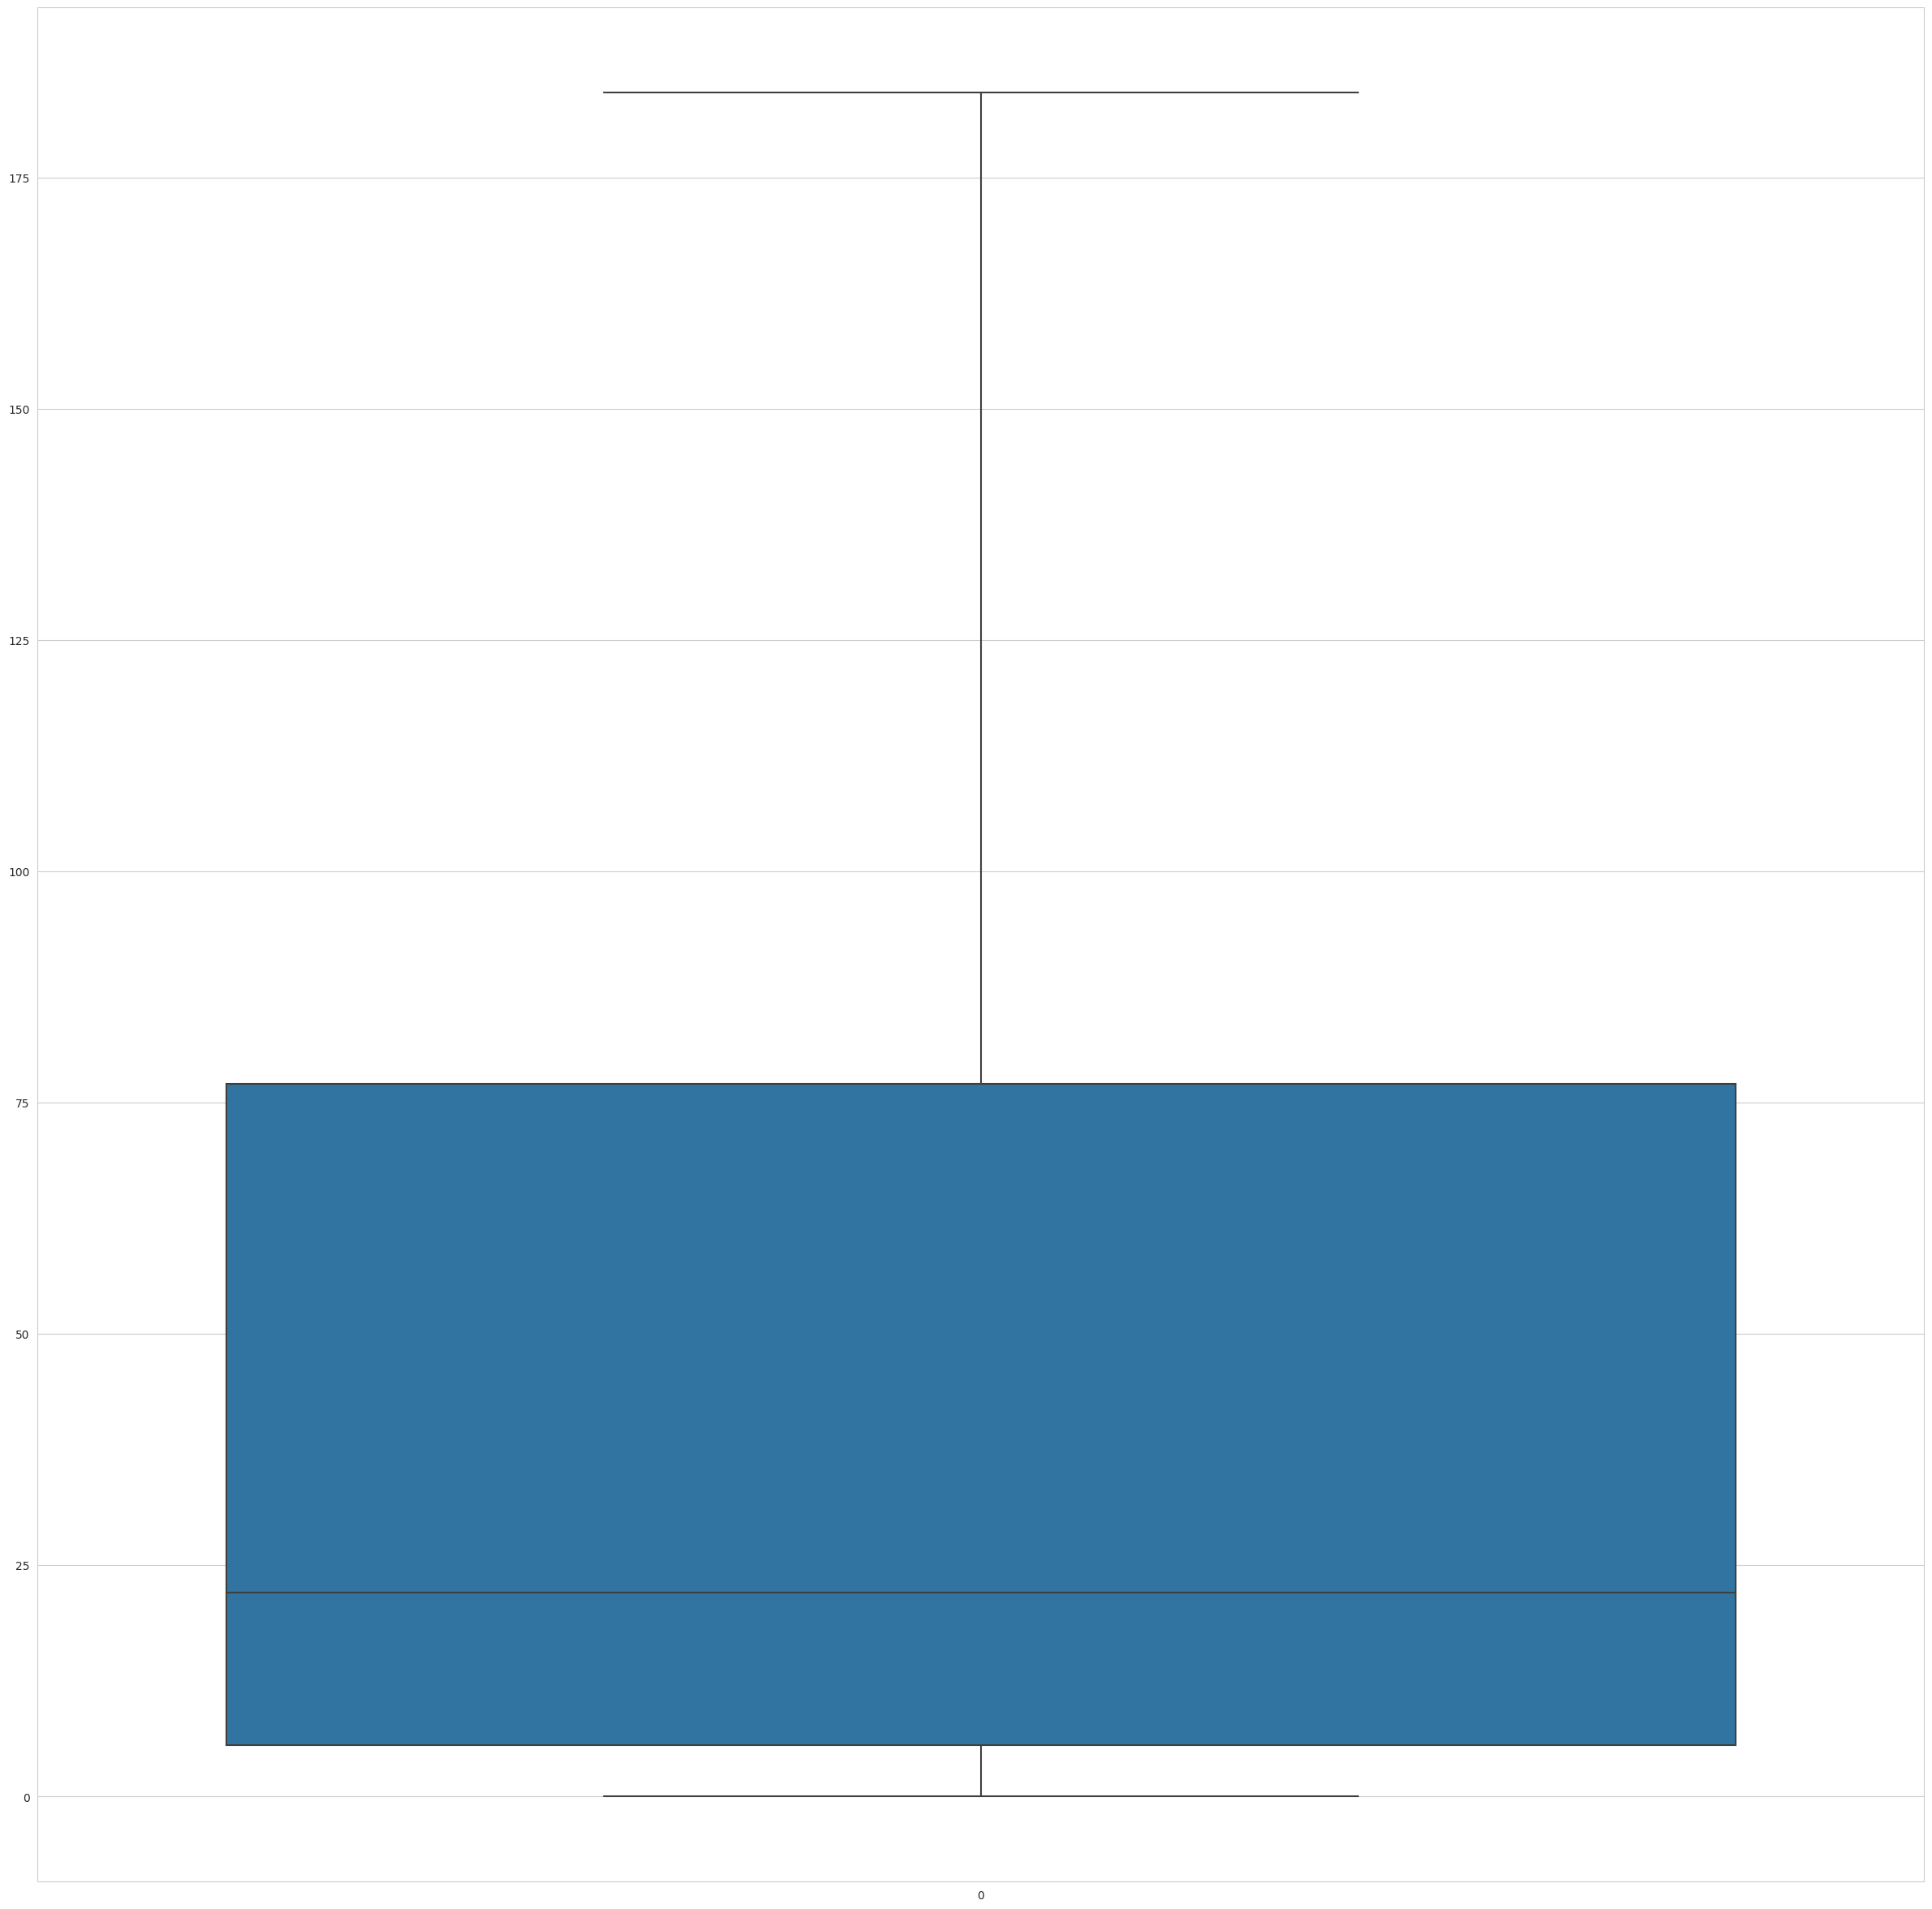

In [289]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df['Amount'])

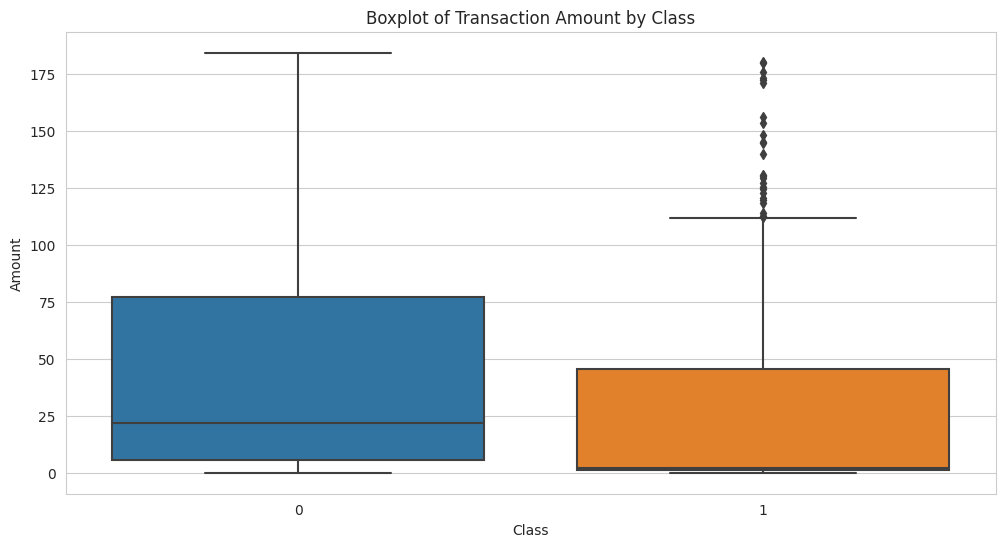

In [290]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Boxplot of Transaction Amount by Class")
plt.show()

In [291]:
skewed_feats = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_to_hours','Class']].skew().sort_values(ascending=False)
print(skewed_feats)

Class            26.589920
V28              11.206759
V21               3.593476
V7                2.639426
V6                1.828187
V10               1.300627
Amount            1.208416
V4                0.667467
V26               0.576653
V9                0.564234
V11               0.329285
V19               0.106699
V13               0.065212
Time_to_hours    -0.035880
V22              -0.213184
V18              -0.225593
V15              -0.308560
V25              -0.413142
V24              -0.552474
V16              -1.004807
V27              -1.176603
V14              -1.872676
V20              -2.041134
V12              -2.150236
V3               -2.214614
V5               -2.418687
V1               -3.282029
V17              -3.371369
V2               -4.635124
V23              -5.807809
V8               -8.543599
dtype: float64


In [292]:
X=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_to_hours']]
y=df['Class']


In [293]:
from sklearn.utils import shuffle
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBClassifier
X, y = shuffle(X, y, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sampling_strategy=0.2
def prepare_to_model(X_train, X_test, y_train, y_test,sampling_strategy):
    pt = PowerTransformer(method='yeo-johnson')
    X_train_trans = pt.fit_transform(X_train)   # fit + transform
    X_test_trans  = pt.transform(X_test)        # only transform
    Ros=RandomOverSampler(random_state=42,sampling_strategy=sampling_strategy)
    X_ros,y_ros=Ros.fit_resample(X_train_trans,y_train)
    
    return X_ros,y_ros

X_ros,y_ros=prepare_to_model(X_train, X_test, y_train, y_test,sampling_strategy)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8482142857142857
Recall: 0.6462585034013606


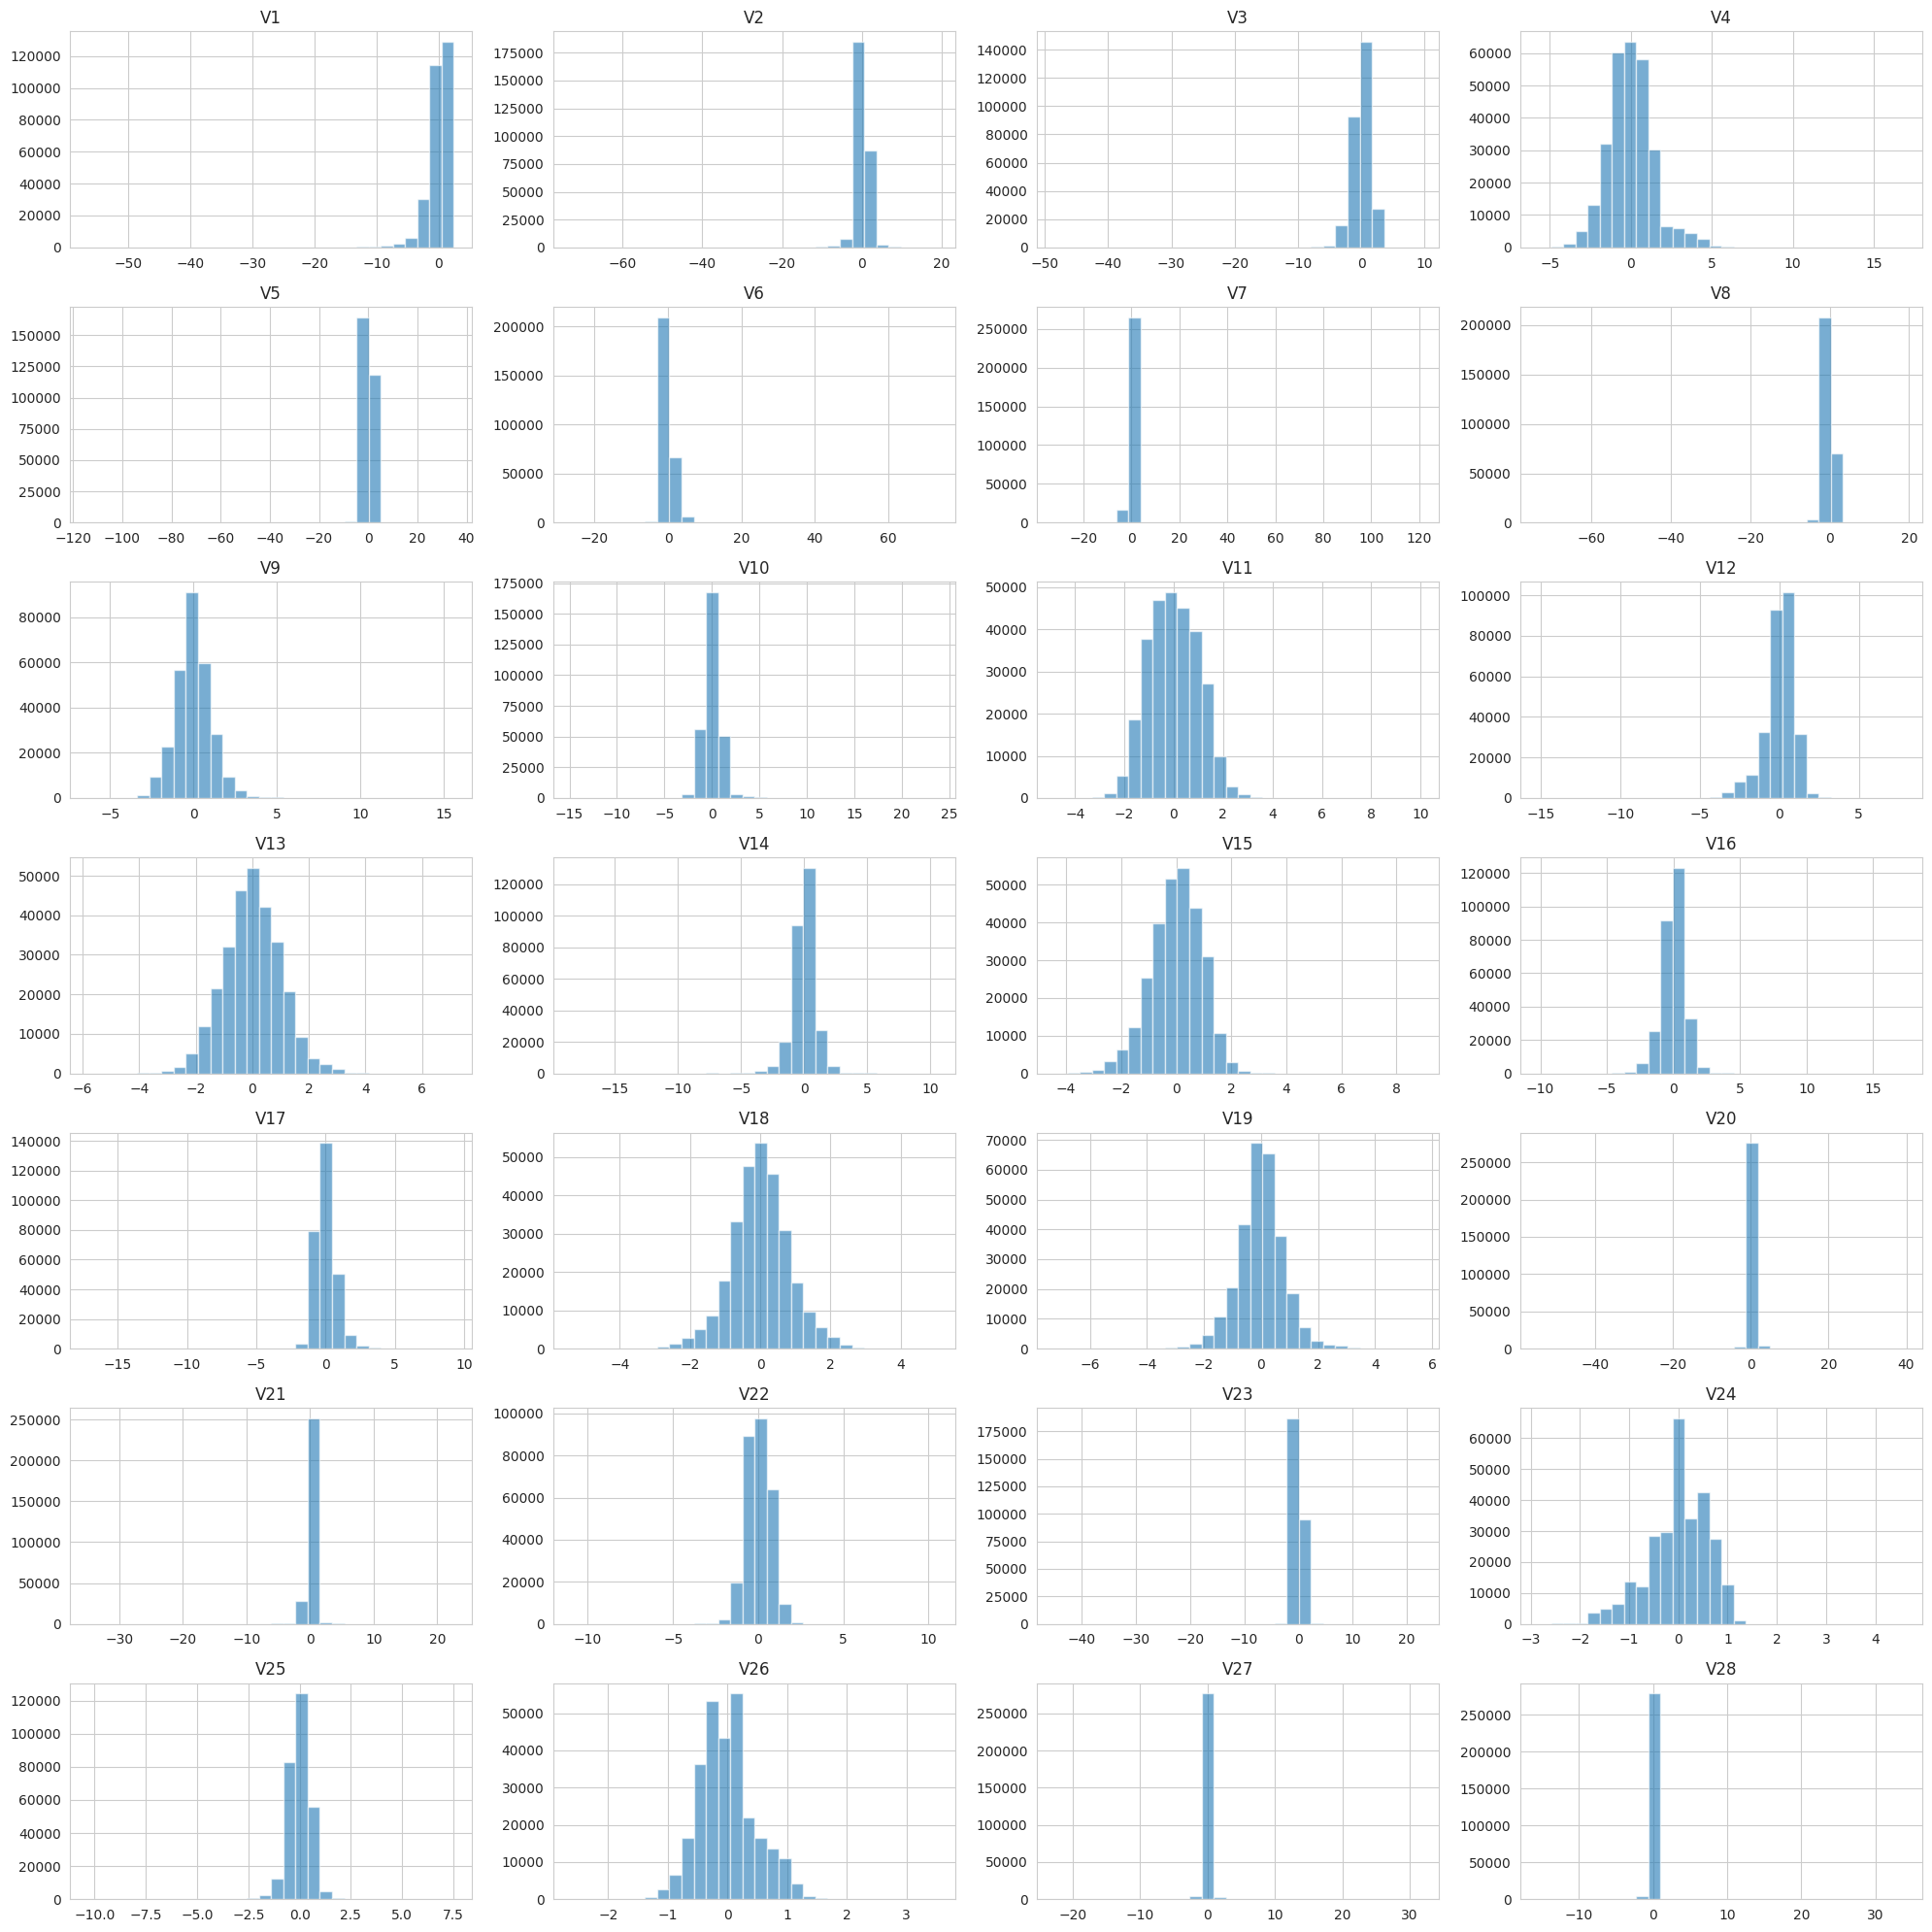

In [294]:
features = [f"V{i}" for i in range(1,29)]
df.groupby("Class")[features].describe()
features = [f"V{i}" for i in range(1,29)]
fig, axes = plt.subplots(7, 4, figsize=(20,20))  # 28 Subplots
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[df["Class"]==0][col], bins=30, alpha=0.6, label="Non-Fraud")
    axes[i].set_title(col)
plt.tight_layout()    
plt.show()

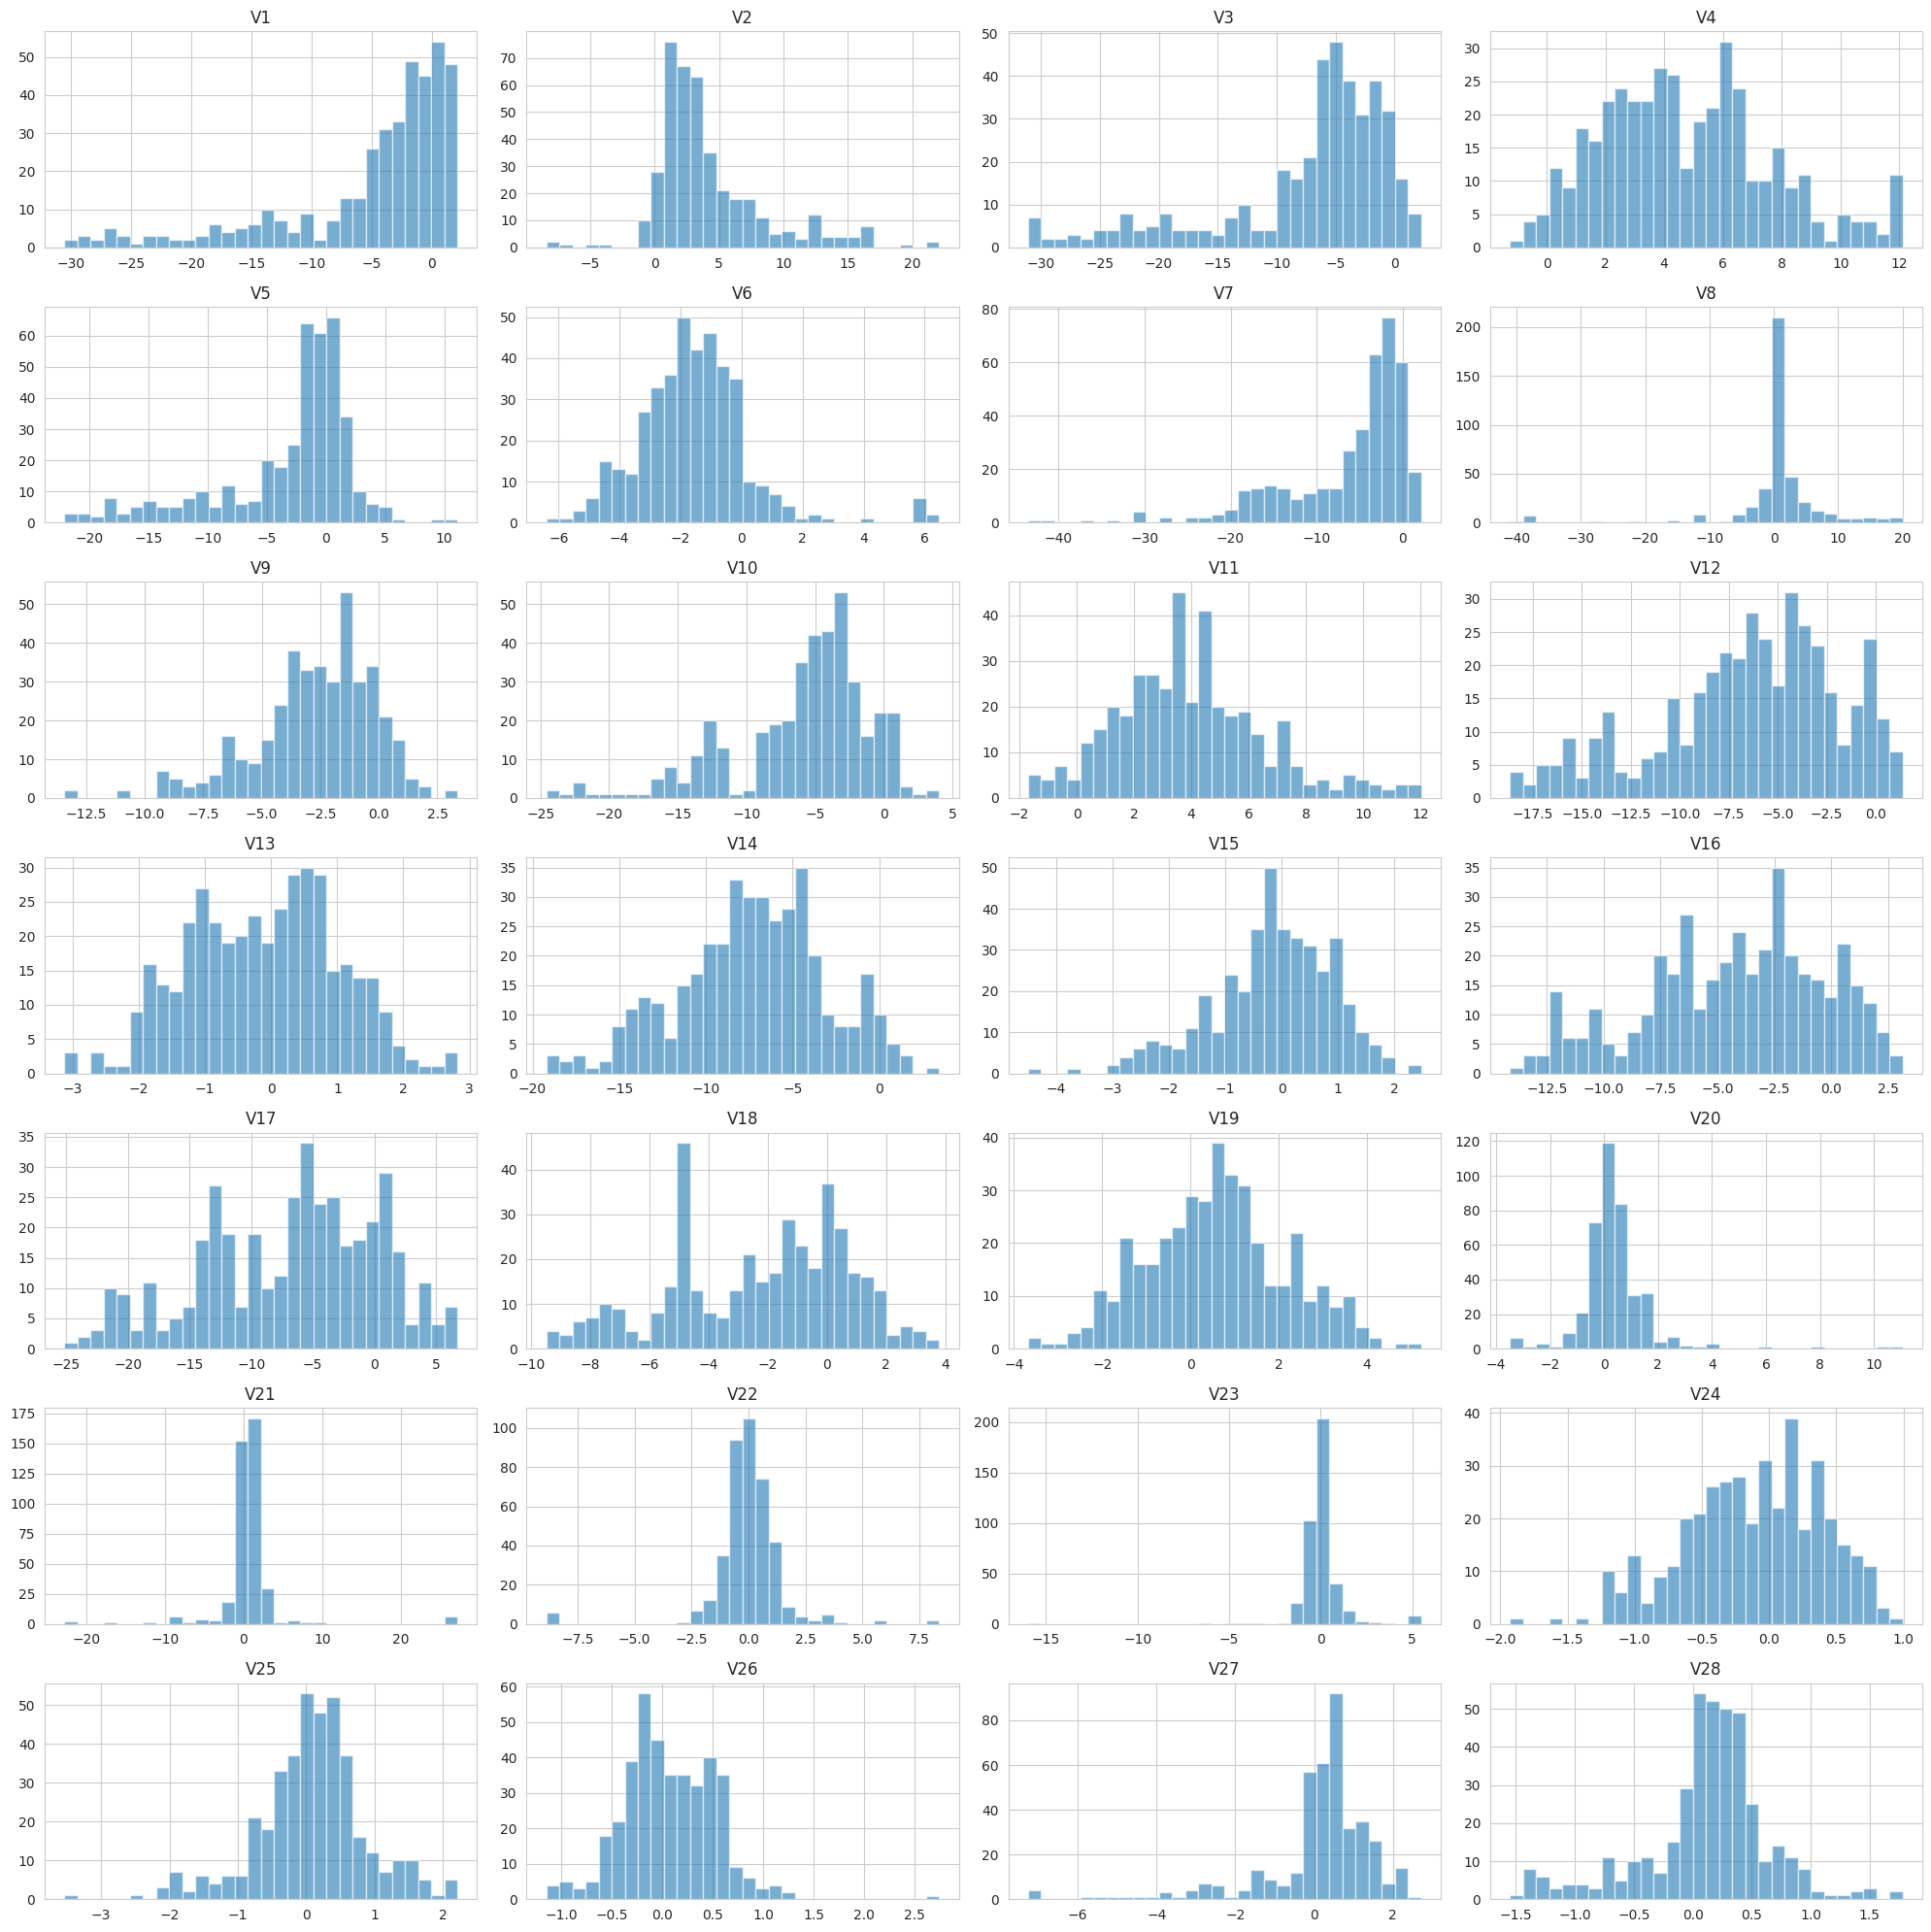

In [295]:
features = [f"V{i}" for i in range(1,29)]
df.groupby("Class")[features].describe()
features = [f"V{i}" for i in range(1,29)]
fig, axes = plt.subplots(7, 4, figsize=(20,20))  # 28 Subplots
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[df["Class"]==1][col], bins=30, alpha=0.6, label="Fraud")
    axes[i].set_title(col)
plt.tight_layout()    
plt.show()

([<matplotlib.patches.Wedge at 0x7b1e3420c110>,
 [Text(-0.9526315144431475, 0.5499938160468311, 'legitemate'),
  Text(0.9526314629490059, -0.549993905238628, 'fraud')],
 [Text(-0.5196171896962622, 0.2999966269346351, '83.33%'),
  Text(0.5196171616085486, -0.29999667558470616, '16.67%')])

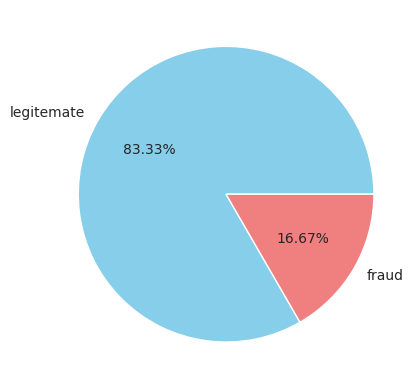

In [296]:
pt = PowerTransformer(method='yeo-johnson')
X_train_trans = pt.fit_transform(X_train)   # fit + transform
X_test_trans  = pt.transform(X_test)        # only transform
Ros=RandomOverSampler(random_state=42,sampling_strategy=.2)
X_ros,y_ros=Ros.fit_resample(X_train_trans,y_train)
plt.pie(x=y_ros.value_counts(),labels=['legitemate','fraud'],autopct='%1.2f%%',colors=['skyblue','lightcoral'])

In [297]:
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_ros, y_ros)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8195488721804511
Recall: 0.8515625


**2.3 Feature Engineering and Scaling**

Create new features from existing ones

Hour and day of week from Time feature

In [298]:
df['hours_to_days'] =round(df["Time_to_hours"] / 24,5)
df['hours_to_days'].value_counts()

hours_to_days
0.91667    10143
0.87500     9473
1.70833     8692
1.62500     8644
0.79167     8638
1.66667     8600
0.45833     8431
0.50000     8364
1.45833     8364
1.41667     8347
0.83333     8307
1.75000     8205
0.62500     8147
1.79167     8134
1.50000     8130
0.41667     8060
1.87500     8006
1.58333     8004
0.70833     7945
0.75000     7901
0.58333     7845
1.83333     7686
1.54167     7657
0.66667     7544
0.54167     7358
0.95833     7318
1.91667     7165
0.37500     6820
1.37500     6547
1.95833     5571
1.00000     4971
1.33333     4333
0.33333     4250
1.29167     3201
0.04167     3160
1.04167     2559
0.29167     2328
0.00000     2260
2.00000     2227
0.12500     2102
1.12500     2091
0.25000     1917
1.08333     1598
1.25000     1547
0.08333     1512
1.16667     1270
0.16667     1251
0.20833     1066
1.20833     1027
Name: count, dtype: int64

In [299]:
def hours_to_days_func(x):
    if np.float32(x)<=1:
        return "first_day"
    else:
        return "second_day"
        


df['hours_to_days'] = df['hours_to_days'].apply(hours_to_days_func)
df['hours_to_days']

0          first_day
1          first_day
2          first_day
3          first_day
4          first_day
             ...    
284802    second_day
284803    second_day
284804    second_day
284805    second_day
284806    second_day
Name: hours_to_days, Length: 284716, dtype: object

In [300]:
df['hours_to_days']=df['hours_to_days'].map({"first_day":0,"second_day":1})
df['hours_to_days']

0         0
1         0
2         0
3         0
4         0
         ..
284802    1
284803    1
284804    1
284805    1
284806    1
Name: hours_to_days, Length: 284716, dtype: int64

Amount categories (low, medium, high)

In [301]:
Q1=df['Amount'].quantile(0.33)
Q2=Q3-Q1
Q3 = df['Amount'].quantile(0.66)

df['Categorized Amount'] = df['Amount'].apply(lambda x:"low" if x<Q1 else ('Meduim'if x>=Q1 and x<=Q3 else 'High') )
df['Categorized Amount']

0           High
1            low
2           High
3           High
4           High
           ...  
284802       low
284803    Meduim
284804      High
284805    Meduim
284806      High
Name: Categorized Amount, Length: 284716, dtype: object

In [302]:
df['Categorized Amount']=df['Categorized Amount'].map({"low":0,"Meduim":1,"High":2})
df['Categorized Amount']

0         2
1         0
2         2
3         2
4         2
         ..
284802    0
284803    1
284804    2
284805    1
284806    2
Name: Categorized Amount, Length: 284716, dtype: int64

In [303]:
corr_matrix = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].corr(method='pearson')
corr_matrix=pd.DataFrame(corr_matrix)
corr_matrix

V1        V2        V3        V4        V5        V6        V7  \
V1   1.000000  0.000860 -0.003157  0.002085 -0.002209 -0.000558 -0.002899   
V2   0.000860  1.000000  0.001933 -0.001152  0.001617  0.000281  0.002059   
V3  -0.003157  0.001933  1.000000  0.003959 -0.004216 -0.001105 -0.005197   
V4   0.002085 -0.001152  0.003959  1.000000  0.002760  0.000596  0.003273   
V5  -0.002209  0.001617 -0.004216  0.002760  1.000000 -0.000442 -0.003534   
V6  -0.000558  0.000281 -0.001105  0.000596 -0.000442  1.000000 -0.001253   
V7  -0.002899  0.002059 -0.005197  0.003273 -0.003534 -0.001253  1.000000   
V8   0.001064 -0.000839  0.002106 -0.001231  0.001582  0.000557  0.002119   
V9  -0.001750  0.001174 -0.003284  0.002329 -0.002407 -0.000527 -0.002904   
V10 -0.003984  0.002630 -0.007823  0.005047 -0.005568 -0.001400 -0.006875   
V11  0.002590 -0.001768  0.005146 -0.003594  0.003667  0.000810  0.004533   
V12 -0.004699  0.003251 -0.009235  0.006347 -0.006600 -0.001554 -0.008083   
V13  0.000096 -0.000189  0.000260 -0.000190  0.000165  0.000032  0.000326   
V14 -0.004640  0.003119 -0.009391  0.006420 -0.006529 -0.001651 -0.007781   
V15  0.000198  0.000003  0.000180 -0.000145  0.000205  0.000043  0.000178   
V16 -0.004007  0.002745 -0.007790  0.005263 -0.005728 -0.001336 -0.007090   
V17 -0.007406  0.004903 -0.013768  0.009401 -0.010310 -0.002302 -0.012927   
V18 -0.002742  0.001826 -0.004954  0.003349 -0.003779 -0.000830 -0.004893   
V19  0.001098 -0.000794  0.002175 -0.001500  0.001706  0.000319  0.001846   
V20 -0.000267  0.000308  0.000026 -0.000184 -0.000092  0.000092 -0.000315   
V21  0.000805 -0.000480  0.001566 -0.000911  0.001042  0.000343  0.001249   
V22  0.000071 -0.000032  0.000196 -0.000130  0.000238 -0.000064  0.000003   
V23 -0.000923  0.000125 -0.001165  0.000788 -0.000412 -0.000435 -0.002165   
V24  0.000016 -0.000065 -0.000055 -0.000032  0.000083  0.000040  0.000102   
V25 -0.000365  0.000114 -0.000567  0.000489 -0.000316 -0.000059 -0.000792   
V26  0.000094 -0.000156  0.000231 -0.000196  0.000224  0.000015  0.000289   
V27  0.000507 -0.000062  0.000919 -0.000958  0.000481  0.000028  0.000734   
V28 -0.000617  0.000065 -0.000709  0.000532 -0.000491  0.000003 -0.000619   

           V8        V9       V10  ...       V19       V20       V21  \
V1   0.001064 -0.001750 -0.003984  ...  0.001098 -0.000267  0.000805   
V2  -0.000839  0.001174  0.002630  ... -0.000794  0.000308 -0.000480   
V3   0.002106 -0.003284 -0.007823  ...  0.002175  0.000026  0.001566   
V4  -0.001231  0.002329  0.005047  ... -0.001500 -0.000184 -0.000911   
V5   0.001582 -0.002407 -0.005568  ...  0.001706 -0.000092  0.001042   
V6   0.000557 -0.000527 -0.001400  ...  0.000319  0.000092  0.000343   
V7   0.002119 -0.002904 -0.006875  ...  0.001846 -0.000315  0.001249   
V8   1.000000  0.001301  0.002746  ... -0.000789 -0.000034 -0.000535   
V9   0.001301  1.000000 -0.004328  ...  0.001232  0.000081  0.000784   
V10  0.002746 -0.004328  1.000000  ...  0.002948  0.000288  0.002140   
V11 -0.001698  0.002953  0.006925  ... -0.002063 -0.000132 -0.001436   
V12  0.003188 -0.005194 -0.012259  ...  0.003548 -0.000018  0.002550   
V13 -0.000114  0.000139  0.000232  ... -0.000047  0.000096 -0.000025   
V14  0.003135 -0.005381 -0.012750  ...  0.003622  0.000514  0.002654   
V15 -0.000090  0.000100  0.000325  ... -0.000207  0.000025 -0.000034   
V16  0.002893 -0.004489 -0.010594  ...  0.003280  0.000194  0.002187   
V17  0.005290 -0.008341 -0.018654  ...  0.005404 -0.000079  0.003776   
V18  0.001997 -0.003018 -0.006686  ...  0.001865 -0.000205  0.001253   
V19 -0.000789  0.001232  0.002948  ...  1.000000 -0.000091 -0.000607   
V20 -0.000034  0.000081  0.000288  ... -0.000091  1.000000 -0.000102   
V21 -0.000535  0.000784  0.002140  ... -0.000607 -0.000102  1.000000   
V22 -0.000115  0.000105  0.000301  ... -0.000254 -0.000052  0.000106   
V23  0.000114 -0.000449 -0.001288  ...  0.000142 -0.000553 -0.000238   
V24 -0.000014 -0.000011 -0.000091  ... -0.000075 

Apply appropriate scaling techniques

In [304]:
X=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 
       'hours_to_days','Categorized Amount']]
y=df['Class']

StandardScaler for SVM and KNN

RobustScaler for outlier-resistant scaling

MinMaxScaler

In [305]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,
    accuracy_score, classification_report
)
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_train,y_train)
scaled_X_test=scaler.transform(X_test)    

In [306]:
pt = PowerTransformer(method='yeo-johnson')
X_train_trans = pt.fit_transform(scaled_X_train)   # fit + transform
X_test_trans  = pt.transform(scaled_X_test)        # only transform
Ros=RandomOverSampler(random_state=42,sampling_strategy=.05)

In [307]:
X_ros,y_ros=Ros.fit_resample(X_train_trans,y_train)
from sklearn.svm import SVC
indices = np.random.choice(len(X_ros), size=22000, replace=False)
X_subset = X_ros[indices]
y_subset = y_ros[indices]

svc_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svc_rbf.fit(X_subset, y_subset)

y_pred = svc_rbf.predict(X_test_trans)

In [308]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
acc=accuracy_score(y_test,y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:",acc)

Precision: 0.7222222222222222
Recall: 0.9069767441860465
Accuracy: 0.9993326777184602


2.4.1 Choose Your Feature Selection Strategy

Filter Methods

In [309]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_to_hours', 'outlier_flag_quantile', 'hours_to_days',
       'Categorized Amount'],
      dtype='object')

In [310]:
X

V1        V2        V3        V4        V5        V6        V7  \
219643  1.893075  0.317083  0.019051  3.669963  0.040974  0.614925 -0.480596   
154384  1.908701 -0.345008 -1.327422  0.226602  0.689536  0.923197 -0.375217   
176537 -1.413472  1.841628 -2.595473 -2.622145  3.574844  2.697228  1.407566   
209059  1.837344 -0.117326 -2.061790  1.152003  0.583324 -0.900701  0.751808   
111193  1.247440  0.269971  0.281041  0.706478 -0.463574 -1.095209  0.025790   
...          ...       ...       ...       ...       ...       ...       ...   
119919  0.768431 -1.670529  1.196968  1.071669 -1.514337  1.577887 -1.240992   
259265  1.789083 -0.218925 -1.851098  0.636855  0.058465 -1.391893  0.441452   
131974 -0.304422  0.953042  0.827622 -0.821737  0.452743 -0.370767  1.035175   
146919  0.544207  1.662319 -0.036348  4.447011  0.834592  1.573197 -0.768900   
121998  1.296531 -0.243940  0.368512 -0.127970 -0.654152 -0.577647 -0.263781   

              V8        V9       V10  ...       V21       V22       V23  \
219643  0.228357 -0.345105  1.386190  ... -0.226727 -0.716254  0.457525   
154384  0.302624  1.900804 -0.209502  ... -0.362535 -0.722002  0.355880   
176537  0.246391  1.074393  2.121924  ... -0.069742  0.696509 -0.206191   
209059 -0.296119 -0.199758  0.527197  ...  0.205738  0.378013 -0.136689   
111193 -0.149209  0.180542 -0.255812  ... -0.296326 -0.912455  0.137446   
...          ...       ...       ...  ...       ...       ...       ...   
119919  0.450362  0.713858  0.275631  ... -0.319894 -0.441504 -0.289863   
259265 -0.408149  0.566397 -0.544256  ...  0.283374  0.698249 -0.132621   
131974 -0.169360 -0.957157 -0.341581  ... -0.338375 -1.082601 -0.025371   
146919 -2.616692 -2.204058  1.073683  ... -1.556117 -0.390233  0.142139   
121998 -0.060212  0.822466 -0.325070  ... -0.378252 -0.972527  0.068010   

             V24       V25       V26       V27       V28  hours_to_days  \
219643  0.463427 -0.545519 -0.402038 -0.000075 -0.021278              1   
154384 -1.746106 -0.554563  0.276474 -0.068208 -0.095296              1   
176537  0.726765  0.036138  0.083630  0.809931  0.273703              1   
209059 -0.426896  0.388184 -0.485094 -0.061772 -0.061957              1   
111193  0.318724  0.181331  0.097242 -0.030281  0.029450              0   
...          ...       ...       ...       ...       ...            ...   
119919 -0.749940  0.393647 -0.165709  0.105040  0.071642              0   
259265 -0.068712  0.190574 -0.112815 -0.024231 -0.008193              1   
131974 -0.311200 -0.243530  0.590900 -0.194948 -0.016069              0   
146919 -0.006251  0.107719  0.124015  0.182707  0.323148              0   
121998 -0.060882  0.155850  1.236114 -0.099291 -0.004883              0   

        Categorized Amount  
219643                   0  
154384                   1  
176537                   0  
209059                   2  
111193                   0  
...                    ...  
119919                   2  
259265                   2  
131974                   1  
146919                   0  
121998                   1  

[284716 rows x 30 columns]

In [311]:
from sklearn.feature_selection import f_classif
f_values=f_classif(X,y)
X = df.drop("Class", axis=1)
y = df["Class"]

F_values, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    "Feature": X.columns,
    "F_value": F_values,
    "p_value": p_values
})

anova_df = anova_df.sort_values("F_value", ascending=False)

print(anova_df.head(25))

                  Feature       F_value        p_value
17                    V17  29179.268382   0.000000e+00
14                    V14  25982.124796   0.000000e+00
12                    V12  18451.099568   0.000000e+00
10                    V10  12393.468060   0.000000e+00
7                      V7  10899.340122   0.000000e+00
3                      V3  10249.342939   0.000000e+00
16                    V16   9761.802315   0.000000e+00
11                    V11   6269.315155   0.000000e+00
4                      V4   4642.742355   0.000000e+00
18                    V18   3035.722508   0.000000e+00
1                      V1   2709.965637   0.000000e+00
2                      V2   2636.143216   0.000000e+00
9                      V9   2484.414309   0.000000e+00
5                      V5   2133.236820   0.000000e+00
6                      V6    567.414290  2.721611e-125
21                    V21    381.835066   5.640025e-85
19                    V19    217.675752   3.031090e-49
20        

2.4.2 Algorithm Selection for Testing :
Choose ONE machine learning algorithm from the following list to test your feature selection

In [312]:
X=df[['V17','V14','V12','V10','V7','V3','V16','V11','V4','V18','V1','V2','V9','V5','V6','V21','V19','V20','Categorized Amount','V8','outlier_flag_quantile',
      'Amount','V28','Time_to_hours','Time','V24','V15','V25','V26','V13','hours_to_days','V23','V22']]
y=df['Class']
X, y = shuffle(X, y, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy : {acc}")
print("Precision:", precision)
print("Recall:", recall)

Accuracy : 0.9991804718140842
Precision: 0.7543859649122807
Recall: 0.671875


Feature Extraction

In [313]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA(n_components=0.50)  # keep enough components to explain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape :", X_pca.shape)

# 3. Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Original shape: (284716, 33)
Reduced shape : (284716, 12)
Explained variance ratio: [0.10452201 0.08633713 0.03327283 0.03193115 0.03112908 0.0306885
 0.03060213 0.03052809 0.03049958 0.03043947 0.03041411 0.03038816]
Total variance explained: 0.5007522381541573


In [314]:
print(np.unique(y_pred, return_counts=True))

(array([0, 1]), array([85301,   114]))


In [315]:
from sklearn.model_selection import train_test_split

y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)



2.4.2 Algorithm Selection for Testing

Choose ONE machine learning algorithm from the following list to test your feature selection 
effectiveness

2.4.3 Implementation and Comparison Framework

Record performance metrics: Precision, Recall, F1-Score, ROC-AUC, PR-AUC

Document training time and model complexity

In [316]:
# Logistic Regression model
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,
    accuracy_score, classification_report
)
import numpy as np

# Start timer
start_time = time.time()

# Model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# End timer
training_time = time.time() - start_time

# Predictions
y_pred = LR.predict(X_test)
y_proba = LR.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)

# Model complexity
num_features = X_train.shape[1]
nonzero_weights = np.count_nonzero(LR.coef_)
model_complexity = {
    "num_features": num_features,
    "nonzero_weights": nonzero_weights
}

# Output
print("Logistic Regression Performance")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nModel Complexity:", model_complexity)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Performance
Training Time: 0.3029 seconds
Accuracy: 0.9986
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5129
PR-AUC: 0.0015

Model Complexity: {'num_features': 12, 'nonzero_weights': 12}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.00      0.00      0.00       119

    accuracy                           1.00     85415
   macro avg       0.50      0.50      0.50     85415
weighted avg       1.00      1.00      1.00     85415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [317]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,
    accuracy_score, classification_report
)

# Start timer
start_time = time.time()

# Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# End timer
training_time = time.time() - start_time

# Predictions
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)

# Model complexity (KNN stores all training samples)
model_complexity = {
    "num_neighbors": knn.n_neighbors,
    "training_samples_stored": len(X_train)
}

# Output
print("K-Nearest Neighbors Performance")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nModel Complexity:", model_complexity)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors Performance
Training Time: 0.4217 seconds
Accuracy: 0.9986
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5009
PR-AUC: 0.0014

Model Complexity: {'num_neighbors': 5, 'training_samples_stored': 199301}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.00      0.00      0.00       119

    accuracy                           1.00     85415
   macro avg       0.50      0.50      0.50     85415
weighted avg       1.00      1.00      1.00     85415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
'''For fraud detection, PCA is usually not ideal unless you just want visualization 
or massive dimensionality reduction.
Feature selection (based on supervised methods like
ANOVA F-values, RFE, or model feature_importances_) 
works better because it keeps fraud-relevant features.
'''

'For fraud detection, PCA is usually not ideal unless you just want visualization \nor massive dimensionality reduction.\nFeature selection (based on supervised methods like\nANOVA F-values, RFE, or model feature_importances_) \nworks better because it keeps fraud-relevant features.\n'

Step 2: Feature Selection Application

Apply your chosen filter method(s) to select top k features (try k = 5, 10, 15, 20)

In [319]:
from sklearn.feature_selection import f_classif
import pandas as pd

X = df.drop("Class", axis=1)
y = df["Class"]

F_values, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    "Feature": X.columns,
    "F_value": F_values,
    "p_value": p_values
})

anova_df = anova_df.sort_values("F_value", ascending=False)
top_5_features = anova_df.head(5)

print("Top 5 Features:")
print(top_5_features)

X_selected1 = X[top_5_features["Feature"]]
X_selected1

Top 5 Features:
   Feature       F_value  p_value
17     V17  29179.268382      0.0
14     V14  25982.124796      0.0
12     V12  18451.099568      0.0
10     V10  12393.468060      0.0
7       V7  10899.340122      0.0


V17       V14       V12       V10        V7
0       0.207971 -0.311169 -0.617801  0.090794  0.239599
1      -0.114805 -0.143772  1.065235 -0.166974 -0.078803
2       1.109969 -0.165946  0.066084  0.207643  0.791461
3      -0.684093 -0.287924  0.178228 -0.054952  0.237609
4      -0.237033 -1.119670  0.538196  0.753074  0.592941
...          ...       ...       ...       ...       ...
284802  1.991691  4.626942  2.711941  4.356170 -4.918215
284803 -0.025693 -0.675143  0.915802 -0.975926  0.024330
284804  0.313502 -0.510602  0.063119 -0.484782 -0.296827
284805  0.509928  0.449624 -0.962886 -0.399126 -0.686180
284806 -0.660377 -0.084316 -0.031513 -0.915427  1.577006

[284716 rows x 5 columns]

In [320]:
top_10_features = anova_df.head(10)

print("Top 10 Features:")
print(top_10_features)

X_selected2 = X[top_10_features["Feature"]]
X_selected2

Top 10 Features:
   Feature       F_value  p_value
17     V17  29179.268382      0.0
14     V14  25982.124796      0.0
12     V12  18451.099568      0.0
10     V10  12393.468060      0.0
7       V7  10899.340122      0.0
3       V3  10249.342939      0.0
16     V16   9761.802315      0.0
11     V11   6269.315155      0.0
4       V4   4642.742355      0.0
18     V18   3035.722508      0.0


V17       V14       V12       V10        V7        V3       V16  \
0       0.207971 -0.311169 -0.617801  0.090794  0.239599  2.536347 -0.470401   
1      -0.114805 -0.143772  1.065235 -0.166974 -0.078803  0.166480  0.463917   
2       1.109969 -0.165946  0.066084  0.207643  0.791461  1.773209 -2.890083   
3      -0.684093 -0.287924  0.178228 -0.054952  0.237609  1.792993 -1.059647   
4      -0.237033 -1.119670  0.538196  0.753074  0.592941  1.548718 -0.451449   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.991691  4.626942  2.711941  4.356170 -4.918215 -9.834783  1.107641   
284803 -0.025693 -0.675143  0.915802 -0.975926  0.024330  2.035030 -0.711757   
284804  0.313502 -0.510602  0.063119 -0.484782 -0.296827 -3.249640  0.140716   
284805  0.509928  0.449624 -0.962886 -0.399126 -0.686180  0.702510 -0.608577   
284806 -0.660377 -0.084316 -0.031513 -0.915427  1.577006  0.703337 -0.302620   

             V11        V4       V18  
0      -0.551600  1.378155  0.025791  
1       1.612727  0.448154 -0.183361  
2       0.624501  0.379780 -0.121359  
3      -0.226487 -0.863291  1.965775  
4      -0.822843  0.403034 -0.038195  
...          ...       ...       ...  
284802 -1.593105 -2.066656  0.510632  
284803 -0.150189 -0.738589 -1.221179  
284804  0.411614 -0.557828  0.395652  
284805 -1.933849  0.689799  1.113981  
284806 -1.040458 -0.506271  0.167430  

[284716 rows x 10 columns]

In [321]:
top_15_features = anova_df.head(15)

print("Top 15 Features:")
print(top_15_features)

X_selected3 = X[top_15_features["Feature"]]
X_selected3

Top 15 Features:
   Feature       F_value        p_value
17     V17  29179.268382   0.000000e+00
14     V14  25982.124796   0.000000e+00
12     V12  18451.099568   0.000000e+00
10     V10  12393.468060   0.000000e+00
7       V7  10899.340122   0.000000e+00
3       V3  10249.342939   0.000000e+00
16     V16   9761.802315   0.000000e+00
11     V11   6269.315155   0.000000e+00
4       V4   4642.742355   0.000000e+00
18     V18   3035.722508   0.000000e+00
1       V1   2709.965637   0.000000e+00
2       V2   2636.143216   0.000000e+00
9       V9   2484.414309   0.000000e+00
5       V5   2133.236820   0.000000e+00
6       V6    567.414290  2.721611e-125


V17       V14       V12       V10        V7        V3       V16  \
0       0.207971 -0.311169 -0.617801  0.090794  0.239599  2.536347 -0.470401   
1      -0.114805 -0.143772  1.065235 -0.166974 -0.078803  0.166480  0.463917   
2       1.109969 -0.165946  0.066084  0.207643  0.791461  1.773209 -2.890083   
3      -0.684093 -0.287924  0.178228 -0.054952  0.237609  1.792993 -1.059647   
4      -0.237033 -1.119670  0.538196  0.753074  0.592941  1.548718 -0.451449   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.991691  4.626942  2.711941  4.356170 -4.918215 -9.834783  1.107641   
284803 -0.025693 -0.675143  0.915802 -0.975926  0.024330  2.035030 -0.711757   
284804  0.313502 -0.510602  0.063119 -0.484782 -0.296827 -3.249640  0.140716   
284805  0.509928  0.449624 -0.962886 -0.399126 -0.686180  0.702510 -0.608577   
284806 -0.660377 -0.084316 -0.031513 -0.915427  1.577006  0.703337 -0.302620   

             V11        V4       V18         V1         V2        V9  \
0      -0.551600  1.378155  0.025791  -1.359807  -0.072781  0.363787   
1       1.612727  0.448154 -0.183361   1.191857   0.266151 -0.255425   
2       0.624501  0.379780 -0.121359  -1.358354  -1.340163 -1.514654   
3      -0.226487 -0.863291  1.965775  -0.966272  -0.185226 -1.387024   
4      -0.822843  0.403034 -0.038195  -1.158233   0.877737  0.817739   
...          ...       ...       ...        ...        ...       ...   
284802 -1.593105 -2.066656  0.510632 -11.881118  10.071785  1.914428   
284803 -0.150189 -0.738589 -1.221179  -0.732789  -0.055080  0.584800   
284804  0.411614 -0.557828  0.395652   1.919565  -0.301254  0.432454   
284805 -1.933849  0.689799  1.113981  -0.240440   0.530483  0.392087   
284806 -1.040458 -0.506271  0.167430  -0.533413  -0.189733  0.486180   

              V5        V6  
0      -0.338321  0.462388  
1       0.060018 -0.082361  
2      -0.503198  1.800499  
3      -0.010309  1.247203  
4      -0.407193  0.095921  
...          ...       ...  
284802 -5.364473 -2.606837  
284803  0.868229  1.058415  
284804  2.630515  3.031260  
284805 -0.377961  0.623708  
284806 -0.012546 -0.649617  

[284716 rows x 15 columns]

In [322]:
top_20_features = anova_df.head(20)

print("Top 20 Features:")
print(top_20_features)

X_selected4 = X[top_20_features["Feature"]]
X_selected4

Top 20 Features:
               Feature       F_value        p_value
17                 V17  29179.268382   0.000000e+00
14                 V14  25982.124796   0.000000e+00
12                 V12  18451.099568   0.000000e+00
10                 V10  12393.468060   0.000000e+00
7                   V7  10899.340122   0.000000e+00
3                   V3  10249.342939   0.000000e+00
16                 V16   9761.802315   0.000000e+00
11                 V11   6269.315155   0.000000e+00
4                   V4   4642.742355   0.000000e+00
18                 V18   3035.722508   0.000000e+00
1                   V1   2709.965637   0.000000e+00
2                   V2   2636.143216   0.000000e+00
9                   V9   2484.414309   0.000000e+00
5                   V5   2133.236820   0.000000e+00
6                   V6    567.414290  2.721611e-125
21                 V21    381.835066   5.640025e-85
19                 V19    217.675752   3.031090e-49
20                 V20    103.414494   2.744926

V17       V14       V12       V10        V7        V3       V16  \
0       0.207971 -0.311169 -0.617801  0.090794  0.239599  2.536347 -0.470401   
1      -0.114805 -0.143772  1.065235 -0.166974 -0.078803  0.166480  0.463917   
2       1.109969 -0.165946  0.066084  0.207643  0.791461  1.773209 -2.890083   
3      -0.684093 -0.287924  0.178228 -0.054952  0.237609  1.792993 -1.059647   
4      -0.237033 -1.119670  0.538196  0.753074  0.592941  1.548718 -0.451449   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.991691  4.626942  2.711941  4.356170 -4.918215 -9.834783  1.107641   
284803 -0.025693 -0.675143  0.915802 -0.975926  0.024330  2.035030 -0.711757   
284804  0.313502 -0.510602  0.063119 -0.484782 -0.296827 -3.249640  0.140716   
284805  0.509928  0.449624 -0.962886 -0.399126 -0.686180  0.702510 -0.608577   
284806 -0.660377 -0.084316 -0.031513 -0.915427  1.577006  0.703337 -0.302620   

             V11        V4       V18         V1         V2        V9  \
0      -0.551600  1.378155  0.025791  -1.359807  -0.072781  0.363787   
1       1.612727  0.448154 -0.183361   1.191857   0.266151 -0.255425   
2       0.624501  0.379780 -0.121359  -1.358354  -1.340163 -1.514654   
3      -0.226487 -0.863291  1.965775  -0.966272  -0.185226 -1.387024   
4      -0.822843  0.403034 -0.038195  -1.158233   0.877737  0.817739   
...          ...       ...       ...        ...        ...       ...   
284802 -1.593105 -2.066656  0.510632 -11.881118  10.071785  1.914428   
284803 -0.150189 -0.738589 -1.221179  -0.732789  -0.055080  0.584800   
284804  0.411614 -0.557828  0.395652   1.919565  -0.301254  0.432454   
284805 -1.933849  0.689799  1.113981  -0.240440   0.530483  0.392087   
284806 -1.040458 -0.506271  0.167430  -0.533413  -0.189733  0.486180   

              V5        V6       V21       V19       V20  Categorized Amount  \
0      -0.338321  0.462388 -0.018307  0.403993  0.251412                   2   
1       0.060018 -0.082361 -0.225775 -0.145783 -0.069083                   0   
2      -0.503198  1.800499  0.247998 -2.261857  0.524980                   2   
3      -0.010309  1.247203 -0.108300 -1.232622 -0.208038                   2   
4      -0.407193  0.095921 -0.009431  0.803487  0.408542                   2   
...          ...       ...       ...       ...       ...                 ...   
284802 -5.364473 -2.606837  0.213454 -0.682920  1.475829                   0   
284803  0.868229  1.058415  0.214205 -1.545556  0.059616                   1   
284804  2.630515  3.031260  0.232045 -0.577252  0.001396                   2   
284805 -0.377961  0.623708  0.265245  2.897849  0.127434                   1   
284806 -0.012546 -0.649617  0.261057 -0.256117  0.382948                   2   

              V8  
0       0.098698  
1       0.085102  
2       0.247676  
3       0.377436  
4      -0.270533  
...          ...  
284802  7.305334  
284803  0.294869  
284804  0.708417  
284805  0.679145  
284806 -0.414650  

[284716 rows x 20 columns]

In [323]:
from sklearn.model_selection import train_test_split

y = df["Class"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_selected1, y, test_size=0.3, random_state=42
)



In [324]:
from sklearn.model_selection import train_test_split

y = df["Class"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_selected2, y, test_size=0.3, random_state=42
)



In [325]:
from sklearn.model_selection import train_test_split

y = df["Class"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_selected3, y, test_size=0.3, random_state=42
)



In [326]:
from sklearn.model_selection import train_test_split

y = df["Class"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X_selected4, y, test_size=0.3, random_state=42
)

Apply your chosen wrapper method(s) to select optimal feature subset

In [332]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=LogisticRegression(), n_features_to_select=5)
selector.fit(X_train, y_train)


Selected Feature Indices: [ 1  2  7  9 11]
